In [ ]:
! pip install yfinance

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
!pip install eli5

In [17]:
!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41444 sha256=03610c293b24e858340bb140f5b1fa273f737f9fbbbeef7306cf1178524cd936
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer


In [54]:
!pip install bioinfokit

  Created wheel for bioinfokit: filename=bioinfokit-2.0.9-py3-none-any.whl size=57899 sha256=d05bcf82dcd929fef2e37c9593f04eb3b7578e5166566ffe35053054b2ecc488
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\2c\f5\d9\52c831e918b10c3137cf83805454583b62d2cdfd121a171172
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32157 sha256=9c36c055ba0c5d786403eb389654e8f6bd3891dce3a86105d092061b357af36e
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\fb\24\13\4c7b7f4121843c2fc7c5d6b4b1e3ab57be33428997761f996f
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7103 sha256=02e6b7a1c0d452fa0873c753a35f1528b3515f55a7265d0aecc1c6a14e07bc5b
  Stored in directory: c:\users\alexandre arriaga\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit matplotlib-venn adjustText


In [1]:
# Modules Importation
import pandas as pd
import csv
import yfinance as yf
from datetime import date
import numpy as np
import random
from statistics import mean
from collinearity import SelectNonCollinear
from scipy.stats import uniform
from scipy.stats import randint
import itertools
import dateutil.parser
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
import sklearn
from sklearn import datasets, svm
import sklearn.metrics as skl
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing as pp
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from bioinfokit.visuz import cluster

################
### Set DataFrame parameters
################ 
pd.set_option('display.max_colwidth', None)

In [110]:
# COVID Data Import 
covid_data=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
covid_data = covid_data[covid_data['location']== 'Portugal']
covid_data=covid_data.drop(columns=['population','iso_code','continent','location','total_cases','new_cases_smoothed','total_deaths','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate','icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_units','total_vaccinations','new_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million'])
covid_data = covid_data.rename(columns={'date':'Date'})
covid_data.drop(covid_data.loc[covid_data['Date'] >= '2022-03-01'].index, inplace=True)
covid_data = covid_data.reset_index()
covid_data = covid_data.drop(columns='index')

################
### Fill Initial NA's
################ 
na_list = ['new_cases','new_deaths','icu_patients','hosp_patients','new_tests','positive_rate','tests_per_case','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations_smoothed']
for i in na_list:
    j=0
    while (pd.isna(covid_data.loc[j,i])) == True:
        covid_data.loc[j,i]=0
        j = j+1
        
################
### Set Date as index
################ 
covid_data.set_index('Date', inplace=True)
covid_data.index = pd.to_datetime(covid_data.index)

################
### Fill NA's for weekly data
################ 
na_list2 = ['new_cases','new_deaths','icu_patients','hosp_patients','new_tests','positive_rate','tests_per_case','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations_smoothed']
for i in na_list2:
    covid_data[i] = covid_data[i].interpolate()

################
### Rename Columns
################ 
covid_data.rename(columns = {'new_vaccinations_smoothed':'new_vaccinations', 'total_boosters':'boosters'}, inplace = True)

covid_data_w_weekends = covid_data  # Covid Data with weekends

################
### Dummy before and after vaccination
################ 
before = []
after = []
for i in covid_data['people_vaccinated']:
    if i == 0:
        before.append(1)
        after.append(0)
    else:
        before.append(0)
        after.append(1)

covid_data['before_vaccination'] = before
covid_data['after_vaccination'] = after

################
### Interaction between dummy and New Cases
################ 
covid_data['new_cases_before_vaccination'] = covid_data['before_vaccination'] * covid_data['new_cases']
covid_data['new_cases_after_vaccination'] = covid_data['after_vaccination'] * covid_data['new_cases']
covid_data.drop(columns={'before_vaccination','after_vaccination'})

################
### New Cases ^2
################
covid_data['new_cases_square'] = covid_data['new_cases'] * covid_data['new_cases']

################
### Lags
################

# 7 Days
covid_data['new_vaccinations_lag7d'] = covid_data['new_vaccinations'].shift(7)
covid_data['new_cases_square_lag7d'] = covid_data['new_cases_square'].shift(7)
covid_data['new_cases_lag7d'] = covid_data['new_cases'].shift(7)

# 14 Days
covid_data['new_vaccinations_lag14d'] = covid_data['new_vaccinations'].shift(14)
covid_data['new_cases_square_lag14d'] = covid_data['new_cases_square'].shift(14)
covid_data['new_cases_lag14d'] = covid_data['new_cases'].shift(14)

# 21 Days
covid_data['new_vaccinations_lag21d'] = covid_data['new_vaccinations'].shift(21)
covid_data['new_cases_square_lag21d'] = covid_data['new_cases_square'].shift(21)
covid_data['new_cases_lag21d'] = covid_data['new_cases'].shift(21)

################
### Drop Weekends
################ 
covid_data = covid_data.reset_index()
covid_data['Day Of Week']= covid_data['Date'].dt.dayofweek
covid_data.drop(covid_data.index[covid_data['Day Of Week'] == 5], inplace=True)
covid_data.drop(covid_data.index[covid_data['Day Of Week'] == 6], inplace=True)
covid_data.set_index('Date', inplace=True)
covid_data = covid_data.drop(columns=['Day Of Week'])

################
### Separate dataframes by type of lag
################
covid_data_0d = covid_data[['new_deaths','people_fully_vaccinated','new_vaccinations','new_cases_square','new_cases']]
covid_data_7d =covid_data[['new_deaths','people_fully_vaccinated','new_vaccinations_lag7d','new_cases_square_lag7d','new_cases_lag7d']]
covid_data_14d = covid_data[['new_deaths','people_fully_vaccinated','new_vaccinations_lag14d','new_cases_square_lag14d','new_cases_lag14d']]
covid_data_21d = covid_data[['new_deaths','people_fully_vaccinated','new_vaccinations_lag21d','new_cases_square_lag21d','new_cases_lag21d']]

display(covid_data_0d)
display(covid_data_7d)
display(covid_data_14d)
display(covid_data_21d)


,new_deaths,people_fully_vaccinated,new_vaccinations,new_cases_square,new_cases
Date,,,,,
2020-03-02,0.0,0.000000e+00,0.0,4.0,2.0
2020-03-03,0.0,0.000000e+00,0.0,0.0,0.0
2020-03-04,0.0,0.000000e+00,0.0,9.0,3.0
2020-03-05,0.0,0.000000e+00,0.0,9.0,3.0
2020-03-06,0.0,0.000000e+00,0.0,25.0,5.0
...,...,...,...,...,...
2022-02-22,28.0,8.758857e+06,25377.0,37785609.0,6147.0
2022-02-23,28.0,8.773080e+06,25040.0,204575809.0,14303.0
2022-02-24,19.0,8.787302e+06,24702.0,377835844.0,19438.0


,new_deaths,people_fully_vaccinated,new_vaccinations_lag7d,new_cases_square_lag7d,new_cases_lag7d
Date,,,,,
2020-03-02,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-03,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-04,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-05,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-06,0.0,0.000000e+00,NaN,NaN,NaN
...,...,...,...,...,...
2022-02-22,28.0,8.758857e+06,38578.0,78996544.0,8888.0
2022-02-23,28.0,8.773080e+06,34628.0,377758096.0,19436.0
2022-02-24,19.0,8.787302e+06,30677.0,456036025.0,21355.0


,new_deaths,people_fully_vaccinated,new_vaccinations_lag14d,new_cases_square_lag14d,new_cases_lag14d
Date,,,,,
2020-03-02,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-03,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-04,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-05,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-06,0.0,0.000000e+00,NaN,NaN,NaN
...,...,...,...,...,...
2022-02-22,28.0,8.758857e+06,62727.0,3.207323e+08,17909.0
2022-02-23,28.0,8.773080e+06,59945.0,1.079188e+09,32851.0
2022-02-24,19.0,8.787302e+06,57163.0,1.312685e+09,36231.0


,new_deaths,people_fully_vaccinated,new_vaccinations_lag21d,new_cases_square_lag21d,new_cases_lag21d
Date,,,,,
2020-03-02,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-03,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-04,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-05,0.0,0.000000e+00,NaN,NaN,NaN
2020-03-06,0.0,0.000000e+00,NaN,NaN,NaN
...,...,...,...,...,...
2022-02-22,28.0,8.758857e+06,76142.0,8.393188e+08,28971.0
2022-02-23,28.0,8.773080e+06,75379.0,2.884120e+09,53704.0
2022-02-24,19.0,8.787302e+06,74616.0,3.306825e+09,57505.0


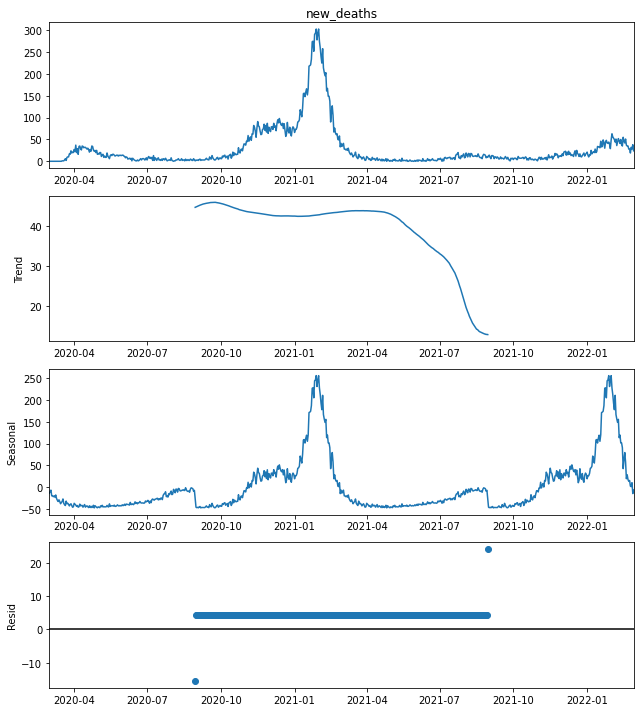

In [115]:
#### Seasonal Decompose ####
series = pd.Series(covid_data_w_weekends['new_deaths'])
result=seasonal_decompose(series, model='additive',period=365)
rcParams['figure.figsize'] = 9,10
figure = result.plot()

In [116]:
# Temperature Data
temperature = pd.read_csv('C:/Users/Alexandre Arriaga/Desktop/Mestrado/Tese/Dados/Temperaturas Diárias CSV.csv',index_col = False,  sep=',',engine='python')
temperature = temperature[['DATE','TAVG']]
temperature.rename(columns = {'DATE': 'Date','TAVG':'temperature'}, inplace = True)
temperature.drop(temperature.loc[temperature['Date'] >= '2022-03-01'].index, inplace=True)
temperature.drop(temperature.loc[temperature['Date'] < '2020-03-02'].index, inplace=True)
temperature = temperature.reset_index()
temperature = temperature.drop(columns='index')
temperature.set_index('Date', inplace=True)
temperature.index = pd.to_datetime(temperature.index)
temperature['temperature'] = temperature['temperature']/10
temperature['temperature_lag7d'] = temperature['temperature'].shift(7)
temperature['temperature_lag14d'] = temperature['temperature'].shift(14)
temperature['temperature_lag21d'] = temperature['temperature'].shift(21)

################
### Drop Weekends
################ 
temperature = temperature.reset_index()
temperature['Day Of Week']= temperature['Date'].dt.dayofweek
temperature.drop(temperature.index[temperature['Day Of Week'] == 5], inplace=True)
temperature.drop(temperature.index[temperature['Day Of Week'] == 6], inplace=True)
temperature.set_index('Date', inplace=True)
temperature = temperature.drop(columns=['Day Of Week'])

################
### Lags
################
temperature_0d = temperature[['temperature']]
temperature_7d = temperature[['temperature_lag7d']]
temperature_14d = temperature[['temperature_lag14d']]
temperature_21d = temperature[['temperature_lag21d']]

display(temperature_0d)
display(temperature_7d)
display(temperature_14d)
display(temperature_21d)

,temperature
Date,
2020-03-02,14.8
2020-03-03,15.3
2020-03-04,16.3
2020-03-05,14.8
2020-03-06,13.7
...,...
2022-02-22,16.7
2022-02-23,16.1
2022-02-24,13.7


,temperature_lag7d
Date,
2020-03-02,NaN
2020-03-03,NaN
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
...,...
2022-02-22,11.8
2022-02-23,13.3
2022-02-24,14.4


,temperature_lag14d
Date,
2020-03-02,NaN
2020-03-03,NaN
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
...,...
2022-02-22,14.7
2022-02-23,13.8
2022-02-24,13.3


,temperature_lag21d
Date,
2020-03-02,NaN
2020-03-03,NaN
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
...,...
2022-02-22,13.4
2022-02-23,12.8
2022-02-24,12.1


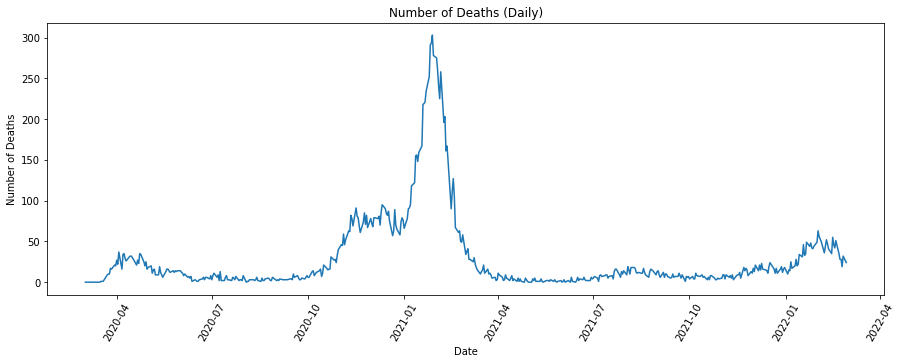

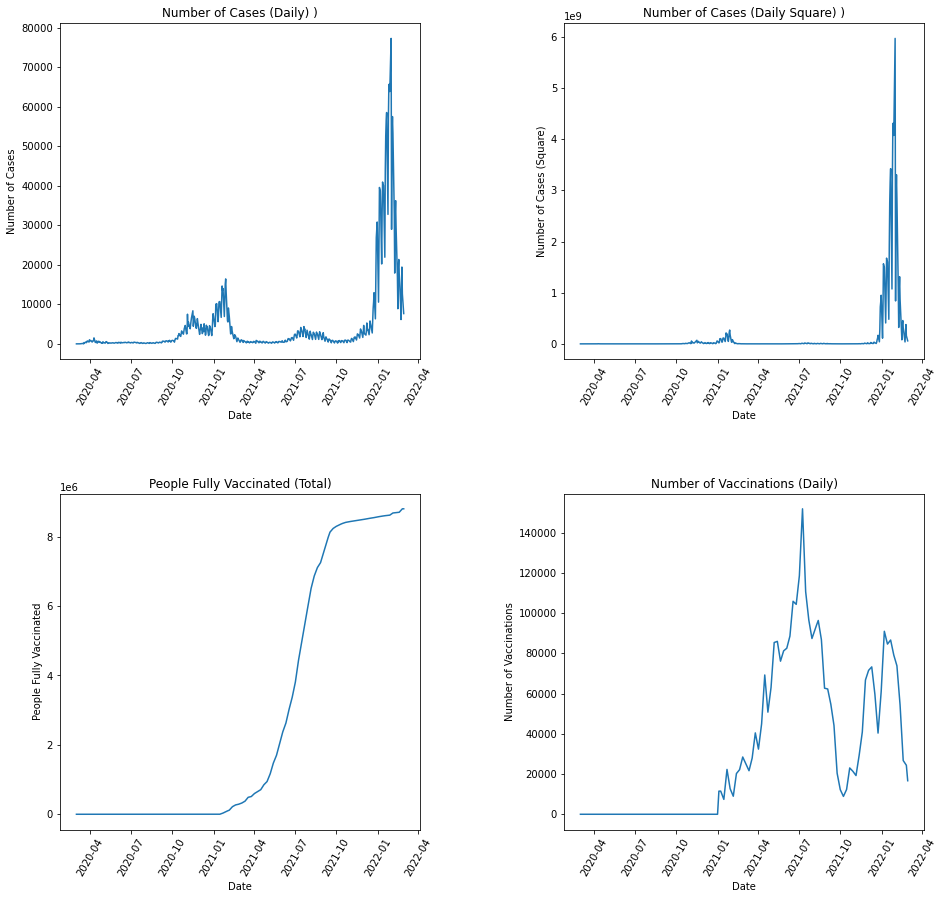

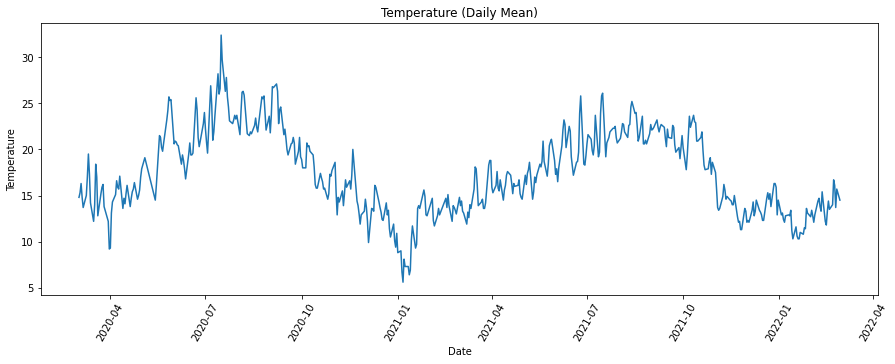

In [121]:
#Plotting Variables

################
### Number of Deaths
################ 
fig, ax1 = plt.subplots(nrows=1, ncols = 1, figsize=(15,5)) 
ax1.plot(covid_data['new_deaths'])
ax1.set_title('Number of Deaths (Daily)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Deaths')

################
### Independent Variables
################ 

fig, [[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=2, ncols = 2, figsize=(15,8))  
# Covid
ax2.plot(covid_data['new_cases'])
ax2.set_title('Number of Cases (Daily) )')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Cases')
ax3.plot(covid_data['new_cases_square'])
ax3.set_title('Number of Cases (Daily Square) )')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of Cases (Square)')
ax4.plot(covid_data['people_fully_vaccinated'])
ax4.set_title('People Fully Vaccinated (Total)')
ax4.set_xlabel('Date')
ax4.set_ylabel('People Fully Vaccinated')
ax5.plot(covid_data['new_vaccinations'])
ax5.set_title('Number of Vaccinations (Daily)')
ax5.set_xlabel('Date')
ax5.set_ylabel('Number of Vaccinations')

################
### Figure parameters (Small Plots)
################ 
plt.subplots_adjust(left=0.1,
                    bottom=-0.5, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Temperature
fig, ax6 = plt.subplots(nrows=1, ncols = 1, figsize=(15,5)) 
ax6.plot(temperature['temperature'])
ax6.set_title('Temperature (Daily Mean)')
ax6.set_xlabel('Date')
ax6.set_ylabel('Temperature')

################
### Figure parameters (All Plots)
################ 
ax1.tick_params(axis='x', rotation=60)
ax2.tick_params(axis='x', rotation=60)
ax3.tick_params(axis='x', rotation=60)
ax4.tick_params(axis='x', rotation=60)
ax5.tick_params(axis='x', rotation=60)
ax6.tick_params(axis='x', rotation=60)

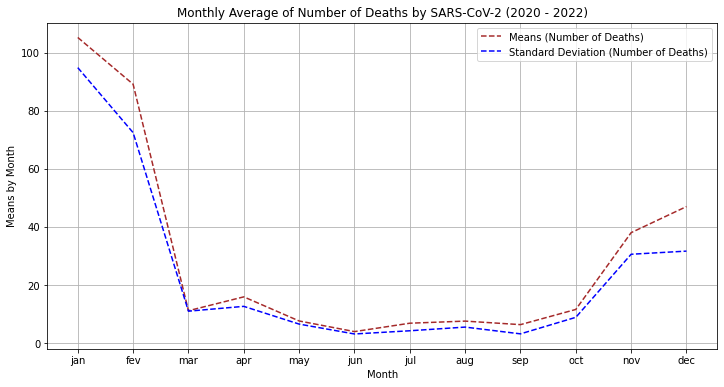

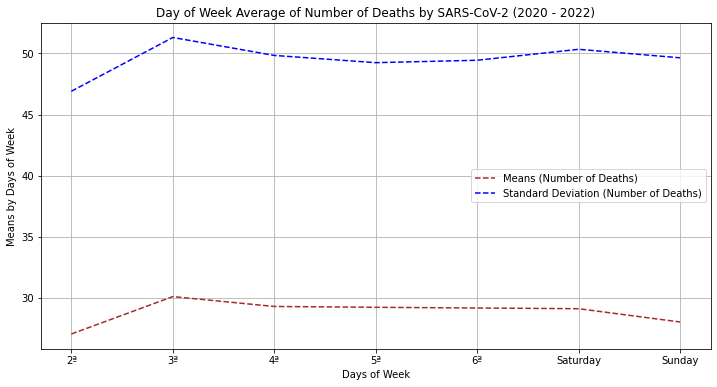

In [122]:
# Ploting Means by Month and Days of Week - PSI-20  #####

################
### Plot Data
################ 
covid_data_means = covid_data_w_weekends

monthly_means = (covid_data_means.groupby([covid_data_means.index.month])
           .mean()
           .rename_axis(index=['month'],)
           .reset_index())
monthly_means_std = (covid_data_means.groupby([covid_data_means.index.month])
           .std()
           .rename_axis(index=['month'],)
           .reset_index())

day_of_week_means = (covid_data_means.groupby([covid_data_means.index.weekday])
           .mean()
           .rename_axis(index=['weekday'],)
           .reset_index())
day_of_week_means_std = (covid_data_means.groupby([covid_data_means.index.weekday])
           .std()
           .rename_axis(index=['weekday'],)
           .reset_index())
day_of_week_means['dayofweek'] = ('2ª','3ª','4ª','5ª','6ª','Saturday','Sunday')
day_of_week_means_std['dayofweek'] = ('2ª','3ª','4ª','5ª','6ª','Saturday','Sunday')

################
### Plot Means by Month
################ 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(monthly_means['month'], monthly_means['new_deaths'], color='brown', linestyle='--', label='Means (Number of Deaths)')
ax.plot(monthly_means_std['month'], monthly_means_std['new_deaths'], color='blue', linestyle='--', label='Standard Deviation (Number of Deaths)')
ax.set_title('Monthly Average of Number of Deaths by SARS-CoV-2 (2020 - 2022)')
ax.set_ylabel('Means by Month')
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['jan','fev','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
ax.legend()
ax.grid()

################
### Plot Means by Day of Week
################ 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(day_of_week_means['dayofweek'], day_of_week_means['new_deaths'], color='brown', linestyle='--', label='Means (Number of Deaths)')
ax.plot(day_of_week_means_std['dayofweek'], day_of_week_means_std['new_deaths'], color='blue', linestyle='--', label='Standard Deviation (Number of Deaths)')
ax.set_title('Day of Week Average of Number of Deaths by SARS-CoV-2 (2020 - 2022)')
ax.set_ylabel('Means by Days of Week')
ax.set_xlabel('Days of Week')
ax.legend()
ax.grid()

In [123]:
# Data Treatment (With out lag's)

################
### Concat Data
################ 
data_0d = covid_data_0d
data_0d = pd.concat([data_0d, temperature_0d], axis=1, join="inner")
data_0d = data_0d.iloc[15:]

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data_0d.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data_0d[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_0d)
data_standard = pd.DataFrame(data_standard)
data_0d = data_0d.reset_index()
data_standard['Date'] = data_0d['Date']
data_0d.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data_0d.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data_0d = data_standard
data_0d.index = pd.to_datetime(data_0d.index)

display(data_0d)

Normal Tests

 new_deaths 
Test Statistic: [370.12817677]            P-Value: [4.24314249e-81]
Not Normal Data

 people_fully_vaccinated 
Test Statistic: [10556.76454247]            P-Value: [0.]
Not Normal Data

 new_vaccinations 
Test Statistic: [54.47179086]            P-Value: [1.48457077e-12]
Not Normal Data

 new_cases_square 
Test Statistic: [584.57642016]            P-Value: [1.15038507e-127]
Not Normal Data

 new_cases 
Test Statistic: [414.92967886]            P-Value: [7.92802566e-91]
Not Normal Data

 temperature 
Test Statistic: [11.47942138]            P-Value: [0.0032157]
Not Normal Data


,new_deaths,people_fully_vaccinated,new_vaccinations,new_cases_square,new_cases,temperature
Date,,,,,,
2020-03-23,-0.415890,-0.813192,-0.898671,-0.239965,-0.404382,-0.523610
2020-03-24,-0.394642,-0.813192,-0.898671,-0.240165,-0.418795,-0.368620
2020-03-25,-0.394642,-0.813192,-0.898671,-0.239649,-0.388600,-0.302196
2020-03-26,-0.245911,-0.813192,-0.898671,-0.239815,-0.396263,-0.833589
2020-03-27,-0.267158,-0.813192,-0.898671,-0.239443,-0.380299,-0.922155
...,...,...,...,...,...,...
2022-02-22,-0.012190,1.575112,-0.225412,-0.177306,0.114402,-0.191489
2022-02-23,-0.012190,1.578990,-0.234353,0.100832,0.858414,-0.324338
2022-02-24,-0.203416,1.582869,-0.243320,0.389760,1.326842,-0.855730


In [124]:
# Data Treatment (7 day lag's)

################
### Concat Data
################ 
data_7d = covid_data_7d
data_7d = pd.concat([data_7d, temperature_7d], axis=1, join="inner")
data_7d = data_7d.dropna()
data_7d = data_7d.iloc[10:]

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data_7d.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data_7d[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_7d)
data_standard = pd.DataFrame(data_standard)
data_7d = data_7d.reset_index()
data_standard['Date'] = data_7d['Date']
data_7d.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data_7d.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data_7d = data_standard
data_7d.index = pd.to_datetime(data_7d.index)

display(data_7d)

Normal Tests

 new_deaths 
Test Statistic: [370.12817677]            P-Value: [4.24314249e-81]
Not Normal Data

 people_fully_vaccinated 
Test Statistic: [10556.76454247]            P-Value: [0.]
Not Normal Data

 new_vaccinations_lag7d 
Test Statistic: [55.25247618]            P-Value: [1.00479448e-12]
Not Normal Data

 new_cases_square_lag7d 
Test Statistic: [585.03698068]            P-Value: [9.13763469e-128]
Not Normal Data

 new_cases_lag7d 
Test Statistic: [420.66731704]            P-Value: [4.50041689e-92]
Not Normal Data

 temperature_lag7d 
Test Statistic: [11.99781205]            P-Value: [0.00248147]
Not Normal Data


,new_deaths,people_fully_vaccinated,new_vaccinations_lag7d,new_cases_square_lag7d,new_cases_lag7d,temperature_lag7d
Date,,,,,,
2020-03-23,-0.415890,-0.813192,-0.889780,-0.236801,-0.425948,-1.188171
2020-03-24,-0.394642,-0.813192,-0.889780,-0.236790,-0.423113,-0.790448
2020-03-25,-0.394642,-0.813192,-0.889780,-0.236813,-0.433814,0.181765
2020-03-26,-0.245911,-0.813192,-0.889780,-0.236624,-0.402991,-0.127575
2020-03-27,-0.267158,-0.813192,-0.889780,-0.236721,-0.412320,-1.055597
...,...,...,...,...,...,...
2022-02-22,-0.012190,1.575112,0.130215,-0.105101,0.379117,-1.276554
2022-02-23,-0.012190,1.578990,0.025777,0.393029,1.343879,-0.945118
2022-02-24,-0.203416,1.582869,-0.078686,0.523544,1.519398,-0.702065


In [125]:
# Data Treatment (14 day lag's)

################
### Concat Data
################ 
data_14d = covid_data_14d
data_14d = pd.concat([data_14d, temperature_14d], axis=1, join="inner")
data_14d = data_14d.dropna()
data_14d = data_14d.iloc[5:]

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data_14d.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data_14d[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_14d)
data_standard = pd.DataFrame(data_standard)
data_14d = data_14d.reset_index()
data_standard['Date'] = data_14d['Date']
data_14d.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data_14d.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data_14d = data_standard
data_14d.index = pd.to_datetime(data_14d.index)

display(data_14d)

Normal Tests

 new_deaths 
Test Statistic: [370.12817677]            P-Value: [4.24314249e-81]
Not Normal Data

 people_fully_vaccinated 
Test Statistic: [10556.76454247]            P-Value: [0.]
Not Normal Data

 new_vaccinations_lag14d 
Test Statistic: [56.33303585]            P-Value: [5.85378397e-13]
Not Normal Data

 new_cases_square_lag14d 
Test Statistic: [586.40075281]            P-Value: [4.6205581e-128]
Not Normal Data

 new_cases_lag14d 
Test Statistic: [430.75250901]            P-Value: [2.90590315e-94]
Not Normal Data

 temperature_lag14d 
Test Statistic: [11.29796009]            P-Value: [0.00352111]
Not Normal Data


,new_deaths,people_fully_vaccinated,new_vaccinations_lag14d,new_cases_square_lag14d,new_cases_lag14d,temperature_lag14d
Date,,,,,,
2020-03-23,-0.415890,-0.813192,-0.877775,-0.231301,-0.419643,-0.574923
2020-03-24,-0.394642,-0.813192,-0.877775,-0.231301,-0.418630,-0.132331
2020-03-25,-0.394642,-0.813192,-0.877775,-0.231301,-0.417985,0.420910
2020-03-26,-0.245911,-0.813192,-0.877775,-0.231301,-0.419643,-0.065942
2020-03-27,-0.267158,-0.813192,-0.877775,-0.231296,-0.414762,-0.751960
...,...,...,...,...,...,...
2022-02-22,-0.012190,1.575112,0.774138,0.303609,1.229558,-0.641312
2022-02-23,-0.012190,1.578990,0.700874,1.568545,2.605535,-0.840478
2022-02-24,-0.203416,1.582869,0.627610,1.957966,2.916792,-0.951126


In [126]:
# Data Treatment (21 day lag's)

################
### Concat Data
################ 
data_21d = covid_data_21d
data_21d = pd.concat([data_21d, temperature_21d], axis=1, join="inner")
data_21d = data_21d.dropna()

################
### Normal Test
################ 
alpha = 0.05
print("\033[1mNormal Tests\033[0m")
for i in data_21d.columns:
    print ('\n\033[1m',i,'\033[0m')
    stat, pvalue = stats.normaltest(data_21d[[i]])
    print ("Test Statistic:", stat, " "*10 , "P-Value:",pvalue)
    if pvalue < alpha:
        print("Not Normal Data")
    else:
        print("Normal Data")

################
### Data Standardization
################ 
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_21d)
data_standard = pd.DataFrame(data_standard)
data_21d = data_21d.reset_index()
data_standard['Date'] = data_21d['Date']
data_21d.set_index('Date', inplace=True)
data_standard.set_index('Date', inplace=True)
data_standard.index = pd.to_datetime(data_standard.index)
j = 0
for i in data_21d.columns:
    data_standard.rename(columns = {j:i}, inplace = True)
    j = j+1
data_21d = data_standard
data_21d.index = pd.to_datetime(data_21d.index)

display(data_21d)

Normal Tests

 new_deaths 
Test Statistic: [370.12817677]            P-Value: [4.24314249e-81]
Not Normal Data

 people_fully_vaccinated 
Test Statistic: [10556.76454247]            P-Value: [0.]
Not Normal Data

 new_vaccinations_lag21d 
Test Statistic: [56.94576857]            P-Value: [4.30906923e-13]
Not Normal Data

 new_cases_square_lag21d 
Test Statistic: [596.50931531]            P-Value: [2.94881806e-130]
Not Normal Data

 new_cases_lag21d 
Test Statistic: [452.10360174]            P-Value: [6.71351954e-99]
Not Normal Data

 temperature_lag21d 
Test Statistic: [10.2436883]            P-Value: [0.00596501]
Not Normal Data


,new_deaths,people_fully_vaccinated,new_vaccinations_lag21d,new_cases_square_lag21d,new_cases_lag21d,temperature_lag21d
Date,,,,,,
2020-03-23,-0.415890,-0.813192,-0.861120,-0.220432,-0.404703,-0.623724
2020-03-24,-0.394642,-0.813192,-0.861120,-0.220432,-0.404891,-0.512824
2020-03-25,-0.394642,-0.813192,-0.861120,-0.220432,-0.404608,-0.291026
2020-03-26,-0.245911,-0.813192,-0.861120,-0.220432,-0.404608,-0.623724
2020-03-27,-0.267158,-0.813192,-0.861120,-0.220432,-0.404420,-0.867702
...,...,...,...,...,...,...
2022-02-22,-0.012190,1.575112,1.140192,1.190462,2.324555,-0.934241
2022-02-23,-0.012190,1.578990,1.120138,4.627769,4.654726,-1.067320
2022-02-24,-0.203416,1.582869,1.100083,5.338336,5.012830,-1.222579


,new_deaths,people_fully_vaccinated,new_vaccinations,new_cases_square,new_cases,temperature
new_deaths,1.000000,-0.209947,-0.210484,0.089912,0.227667,-0.475147
people_fully_vaccinated,-0.209947,1.000000,0.543545,0.338771,0.411234,-0.071021
new_vaccinations,-0.210484,0.543545,1.000000,0.251584,0.276628,0.009271
new_cases_square,0.089912,0.338771,0.251584,1.000000,0.940485,-0.272120
new_cases,0.227667,0.411234,0.276628,0.940485,1.000000,-0.391394
temperature,-0.475147,-0.071021,0.009271,-0.272120,-0.391394,1.000000


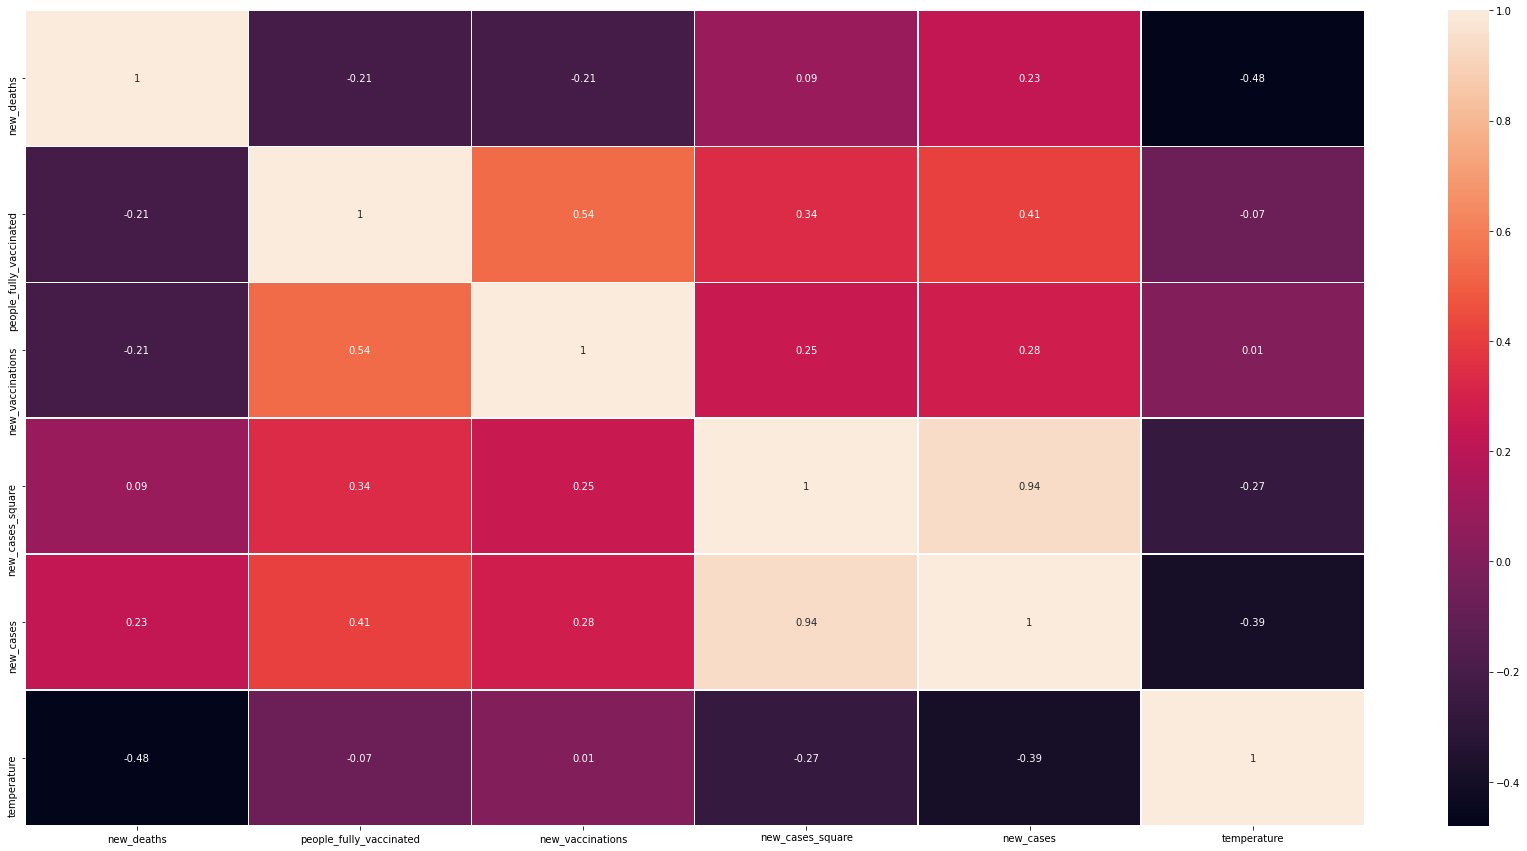

In [127]:
# Data Correlation (With out lag's)

################
### Set correlation DataFrame
################ 
correlation = data_0d.corr()
display(correlation)
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

,new_deaths,people_fully_vaccinated,new_vaccinations_lag7d,new_cases_square_lag7d,new_cases_lag7d,temperature_lag7d
new_deaths,1.000000,-0.209947,-0.206958,0.104375,0.250397,-0.505888
people_fully_vaccinated,-0.209947,1.000000,0.585358,0.336631,0.402592,-0.049531
new_vaccinations_lag7d,-0.206958,0.585358,1.000000,0.253114,0.283262,0.009299
new_cases_square_lag7d,0.104375,0.336631,0.253114,1.000000,0.943005,-0.269145
new_cases_lag7d,0.250397,0.402592,0.283262,0.943005,1.000000,-0.381726
temperature_lag7d,-0.505888,-0.049531,0.009299,-0.269145,-0.381726,1.000000


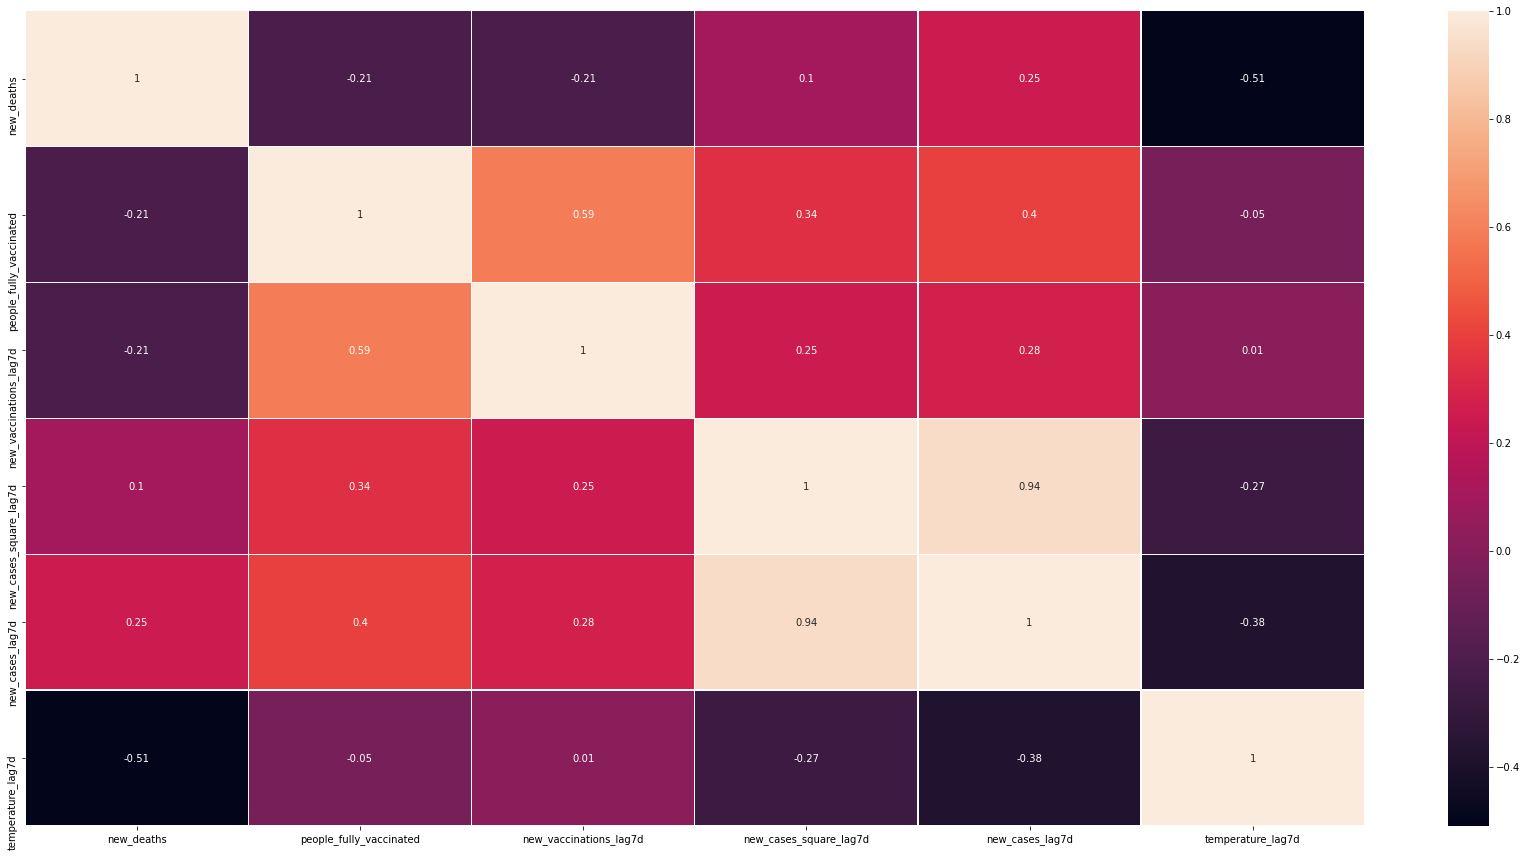

In [128]:
# Data Correlation (7 day lag)

################
### Set correlation DataFrame
################ 
correlation = data_7d.corr()
display(correlation)
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

,new_deaths,people_fully_vaccinated,new_vaccinations_lag14d,new_cases_square_lag14d,new_cases_lag14d,temperature_lag14d
new_deaths,1.000000,-0.209947,-0.211528,0.099240,0.242057,-0.556876
people_fully_vaccinated,-0.209947,1.000000,0.623616,0.332304,0.390540,-0.021141
new_vaccinations_lag14d,-0.211528,0.623616,1.000000,0.255026,0.289971,0.012059
new_cases_square_lag14d,0.099240,0.332304,0.255026,1.000000,0.946722,-0.267243
new_cases_lag14d,0.242057,0.390540,0.289971,0.946722,1.000000,-0.376049
temperature_lag14d,-0.556876,-0.021141,0.012059,-0.267243,-0.376049,1.000000


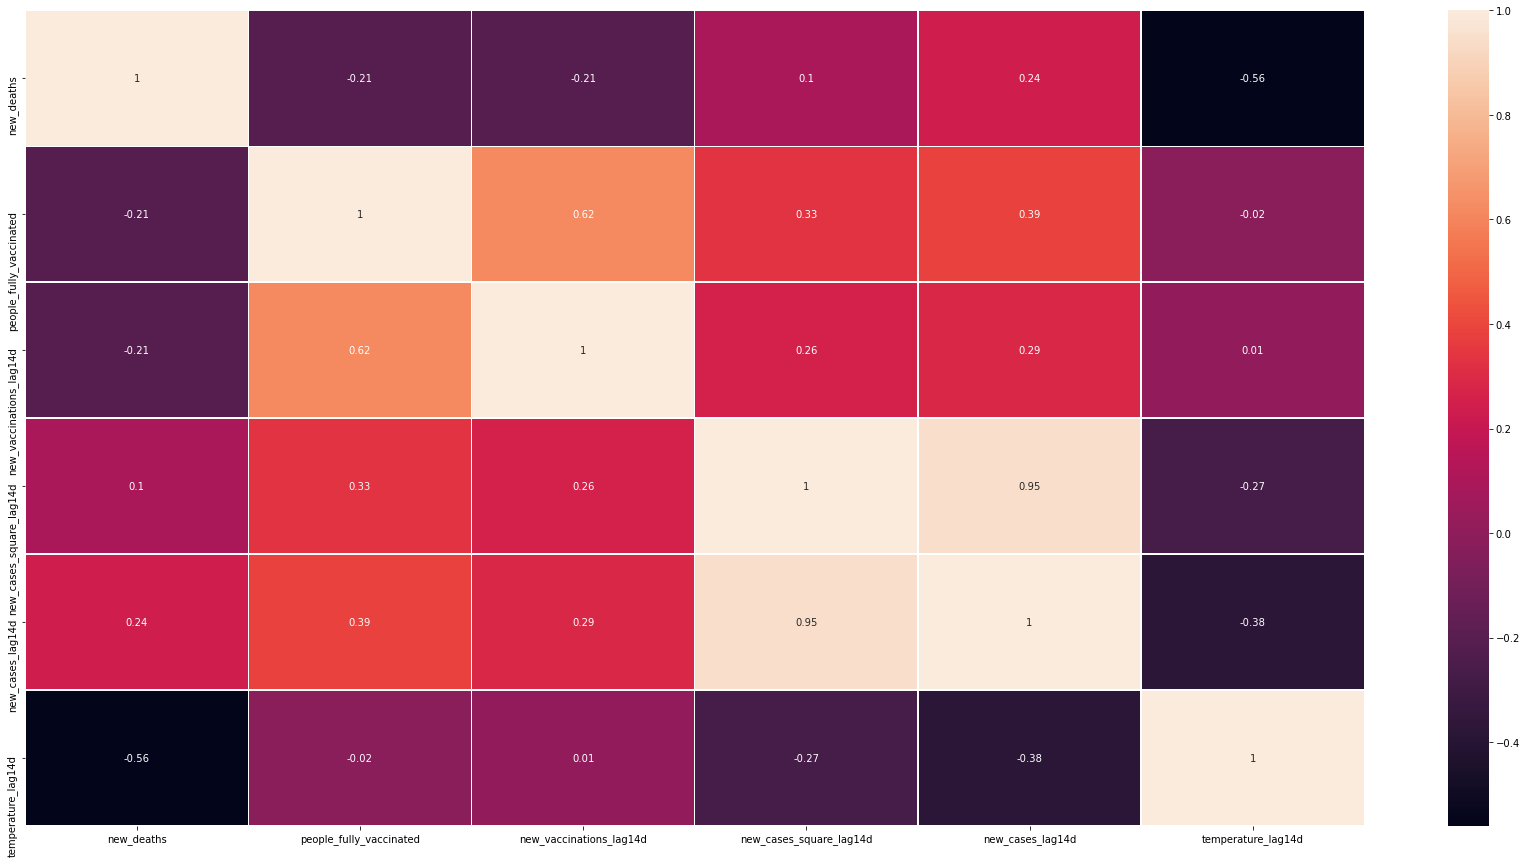

In [129]:
# Data Correlation (14 day lag)

################
### Set correlation DataFrame
################ 
correlation = data_14d.corr()
display(correlation)
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

,new_deaths,people_fully_vaccinated,new_vaccinations_lag21d,new_cases_square_lag21d,new_cases_lag21d,temperature_lag21d
new_deaths,1.000000,-0.209947,-0.223953,0.083937,0.222206,-0.559779
people_fully_vaccinated,-0.209947,1.000000,0.652805,0.315928,0.364720,0.004708
new_vaccinations_lag21d,-0.223953,0.652805,1.000000,0.251327,0.285826,0.021690
new_cases_square_lag21d,0.083937,0.315928,0.251327,1.000000,0.949620,-0.260679
new_cases_lag21d,0.222206,0.364720,0.285826,0.949620,1.000000,-0.367930
temperature_lag21d,-0.559779,0.004708,0.021690,-0.260679,-0.367930,1.000000


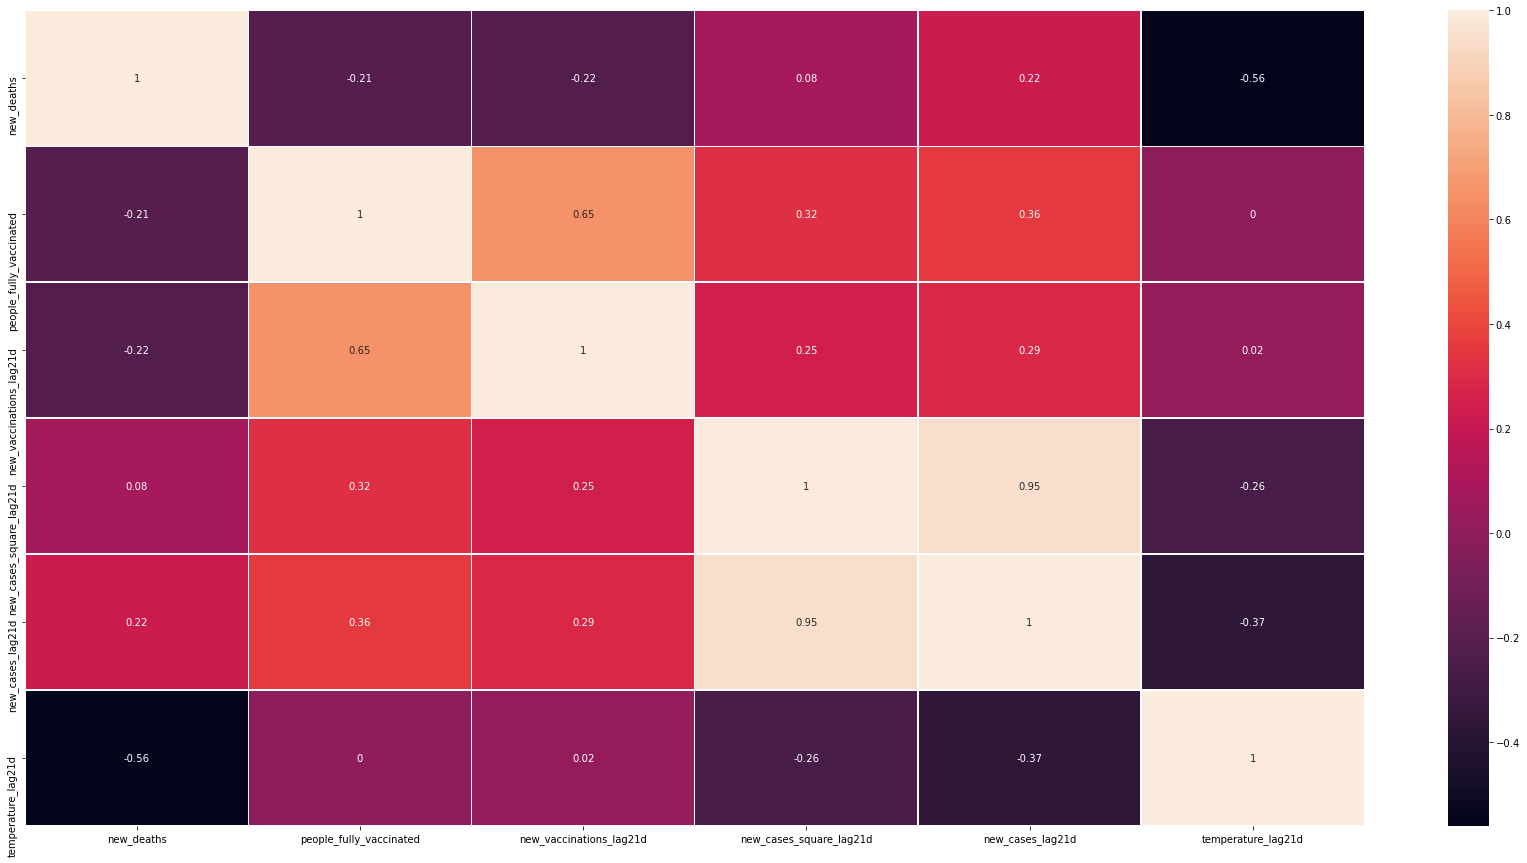

In [130]:
# Data Correlation (21 day lag)

################
### Set correlation DataFrame
################ 
correlation = data_21d.corr()
display(correlation)
correlation= correlation.fillna(0)
correlation = round(correlation,2)

################
### Plot correlations
################ 
fig, ax = plt.subplots(figsize=(30,15))       
plot_corr=sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

In [95]:
# Variables Choice

# Os Boosters seja sem lag ou com qualquer um dos lag's tem uma correlação perto de 0 com o número de mortes, 
    #portanto a variável vai ser removida
    
# Após verificar as correlações escolheu-se o lag de cada variável mais correlacionado com o número de mortes:
data = data_0d[['new_deaths','people_fully_vaccinated']]
data = pd.concat([data, data_7d[['new_cases_square_lag7d','new_cases_lag7d']]], axis=1, join="inner")
data = pd.concat([data, data_21d[['new_vaccinations_lag21d','temperature_lag21d']]], axis=1, join="inner")
display(data)

,new_deaths,people_fully_vaccinated,new_cases_square_lag7d,new_cases_lag7d,new_vaccinations_lag21d,temperature_lag21d
Date,,,,,,
2020-03-23,-0.415890,-0.813192,-0.236801,-0.425948,-0.861120,-0.623724
2020-03-24,-0.394642,-0.813192,-0.236790,-0.423113,-0.861120,-0.512824
2020-03-25,-0.394642,-0.813192,-0.236813,-0.433814,-0.861120,-0.291026
2020-03-26,-0.245911,-0.813192,-0.236624,-0.402991,-0.861120,-0.623724
2020-03-27,-0.267158,-0.813192,-0.236721,-0.412320,-0.861120,-0.867702
...,...,...,...,...,...,...
2022-02-22,-0.012190,1.575112,-0.105101,0.379117,1.140192,-0.934241
2022-02-23,-0.012190,1.578990,0.393029,1.343879,1.120138,-1.067320
2022-02-24,-0.203416,1.582869,0.523544,1.519398,1.100083,-1.222579


In [131]:
# Model Validation

################
### Data
################ 
y= data['new_deaths']
x = data.drop('new_deaths', axis=1)

################
### Model Validation
################

# Split train and test data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20,random_state=8) 

# Model and Prediction
model_ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(" "* 5,"\n\033[1mOLS Model\033[0m")
print(model_ols.summary())
Y_test_pred_ols = model_ols.predict(sm.add_constant(X_test))

# Adj R2 Score
r2 = skl.r2_score(Y_test, Y_test_pred_ols)
adj_r2 = 1 - (1-r2) * (len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("\n\033[1mAdj R2 Score:\033[0m")
print("R2 Score:" , adj_r2)

# VIF
x_temp = sm.add_constant(X_train)

vif_data = pd.DataFrame()
vif_data["feature"] = x_temp.columns
vif_data["VIF"] = [variance_inflation_factor(x_temp.values, i)
                          for i in range(len(x_temp.columns))]

print("\n\033[1mVIF between variables:\033[0m")
display(vif_data)


      
OLS Model
                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     75.91
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.99e-55
Time:                        23:21:31   Log-Likelihood:                -448.27
No. Observations:                 396   AIC:                             908.5
Df Residuals:                     390   BIC:                             932.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const    

,feature,VIF
0,const,1.003816
1,people_fully_vaccinated,2.097679
2,new_cases_square_lag7d,10.759961
3,new_cases_lag7d,12.982281
4,new_vaccinations_lag21d,1.804159
5,temperature_lag21d,1.458461


      
OLS Model
                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     75.91
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.99e-55
Time:                        23:22:08   Log-Likelihood:                -448.27
No. Observations:                 396   AIC:                             908.5
Df Residuals:                     390   BIC:                             932.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const    

,Date,Residuals,mean
0,2020-09-23,-0.139368,-0.061253
1,2021-02-18,0.898442,-0.061253
2,2020-08-14,-0.182401,-0.061253
3,2021-05-20,-0.648948,-0.061253
4,2020-04-02,-0.307701,-0.061253
...,...,...,...
94,2020-08-07,0.443562,-0.061253
95,2020-11-18,0.484345,-0.061253
96,2020-06-02,-0.034807,-0.061253
97,2020-03-30,-0.527451,-0.061253


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: 1.8520849393719567


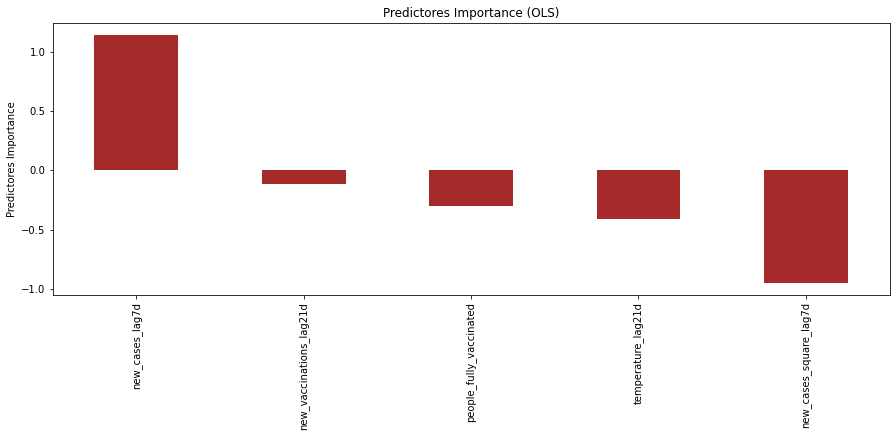

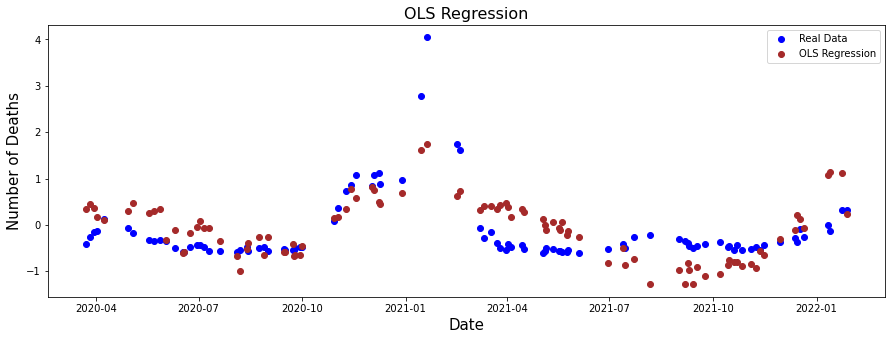

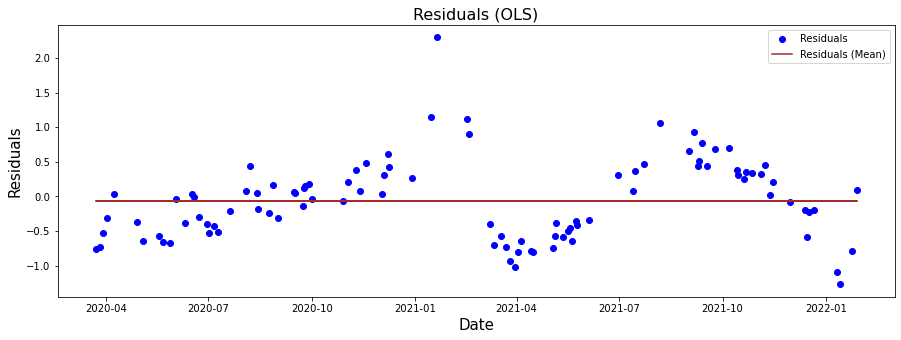

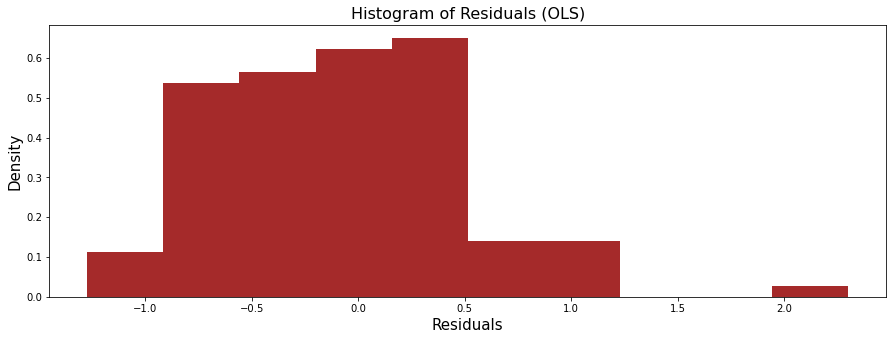

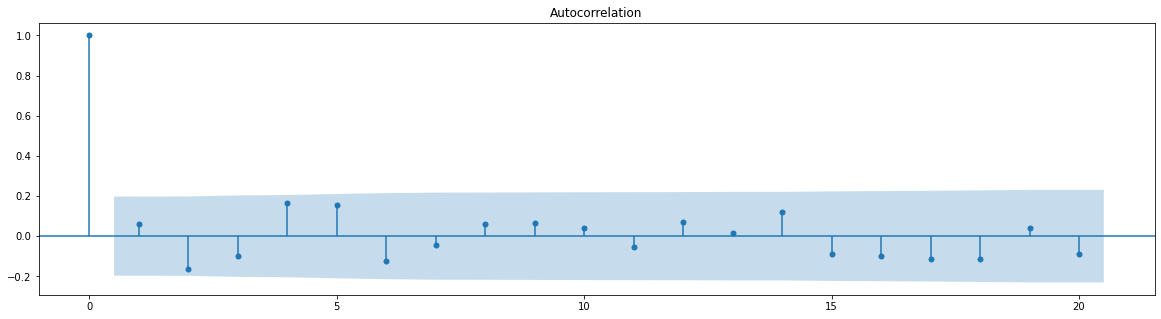

In [132]:
# OLS Regression

################
### Fit Model
################ 
model_ols = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print(" "* 5,"\n\033[1mOLS Model\033[0m")
print(model_ols.summary())

################
### Prediction
################ 
Y_test_pred_ols = model_ols.predict(sm.add_constant(X_test))
predictors_ols=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_ols= pd.Series(model_ols.params, predictors_ols).sort_values(ascending=False)
pred_importance_ols.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (OLS)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_ols, 'o', c='brown', label="OLS Regression")
ax.set_title('OLS Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('Number of Deaths', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_ols_df = pd.DataFrame(Y_test.values - Y_test_pred_ols.values)
residuals_ols_df.rename(columns = {0:'Residuals'}, inplace = True)
residuals_ols_df.index = Y_test.index
residuals_ols_df = residuals_ols_df.reset_index()
residuals_ols_df['mean'] = residuals_ols_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_ols_df)

# PLotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_ols_df['Date'],residuals_ols_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_ols_df['Date'],residuals_ols_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (OLS)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_ols_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (OLS)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_ols_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_ols.values))



Optimal Alpha (Ridge): 0.01
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
      
Ridge Model


,people_fully_vaccinated,new_cases_square_lag7d,new_cases_lag7d,new_vaccinations_lag21d,temperature_lag21d
Coefficients,,,,,
Coefficients,-0.298458,-0.946934,1.138751,-0.113800,-0.407096


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2020-09-23,-0.139308,-0.061271
1,2021-02-18,0.898462,-0.061271
2,2020-08-14,-0.182368,-0.061271
3,2021-05-20,-0.649070,-0.061271
4,2020-04-02,-0.307755,-0.061271
...,...,...,...
94,2020-08-07,0.443705,-0.061271
95,2020-11-18,0.484496,-0.061271
96,2020-06-02,-0.034791,-0.061271
97,2020-03-30,-0.527549,-0.061271


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.85204617]


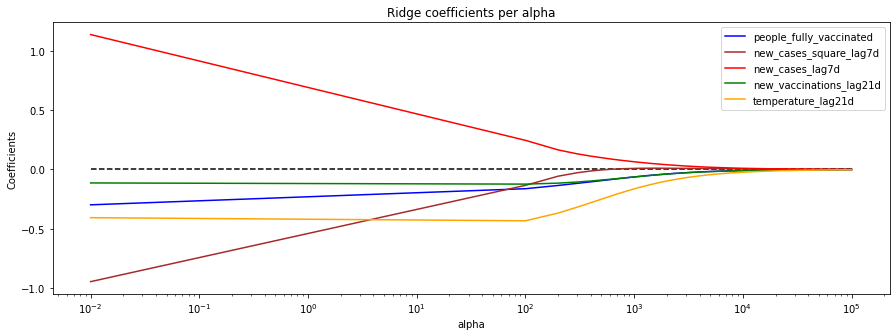

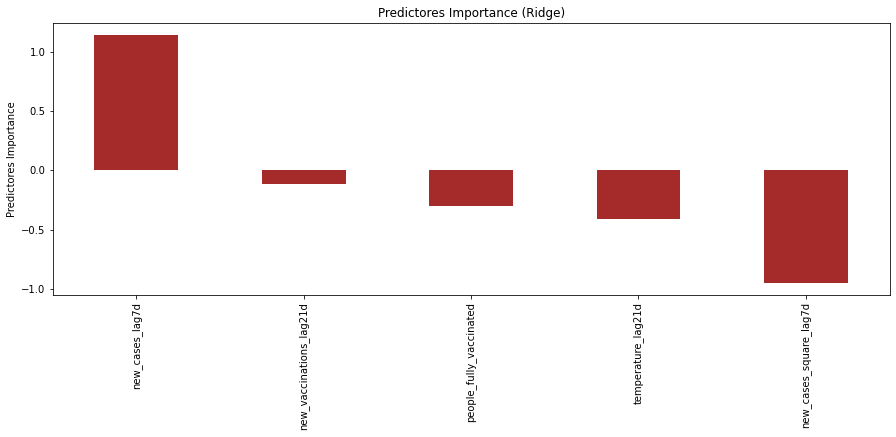

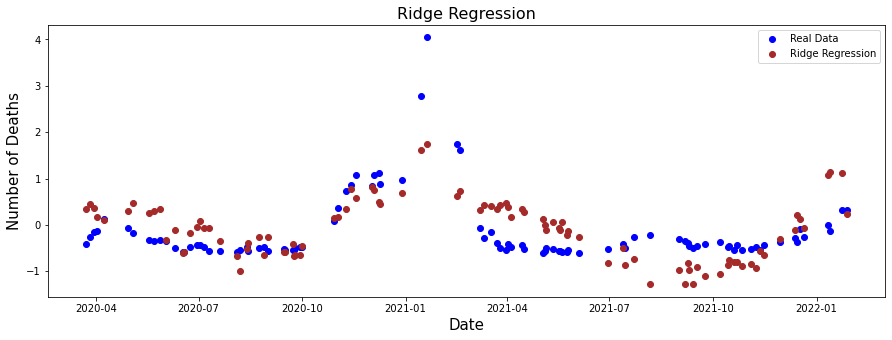

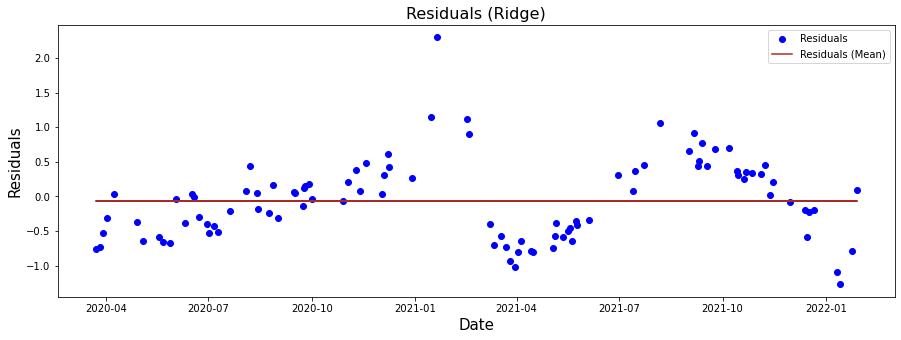

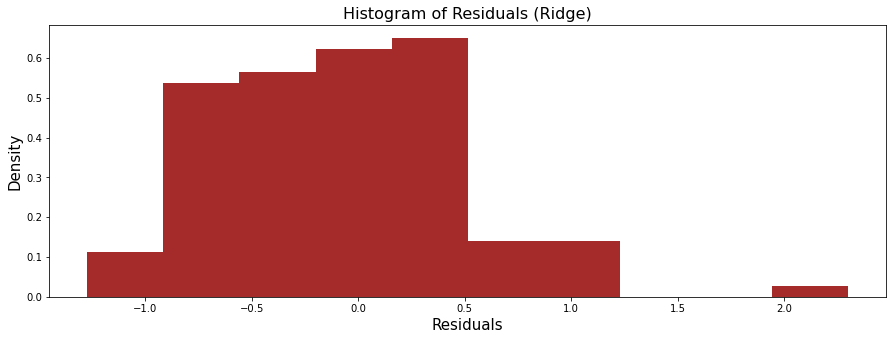

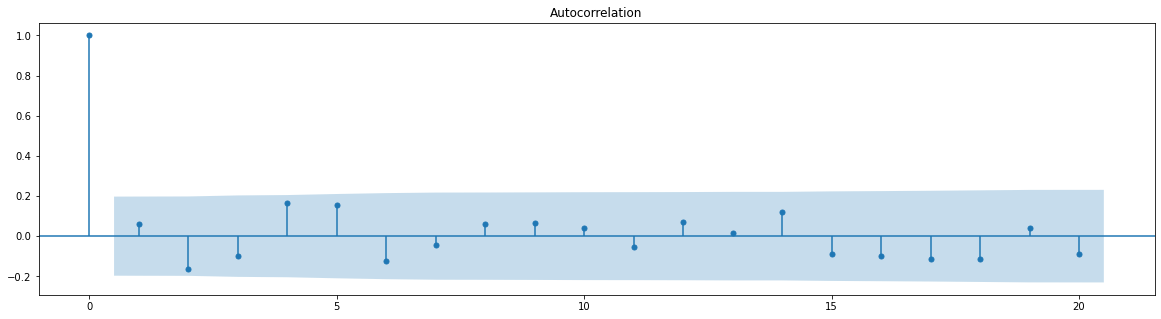

In [133]:
# Ridge Regression

################
### Optimal Parameters
################ 
alphas_Ridge = np.linspace(0.01,100000,1000)
model_alpha_Ridge = Ridge(max_iter=10000)
coefs_alpha_Ridge = []

for i in alphas_Ridge:
    model_alpha_Ridge.set_params(alpha=i)
    model_alpha_Ridge.fit(X_train, Y_train)
    coefs_alpha_Ridge.append(model_alpha_Ridge.coef_)

# Plot convergency of coefficients with the increase of alpha
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(alphas_Ridge,[item[0] for item in coefs_alpha_Ridge],label='people_fully_vaccinated',color='blue')
ax.plot(alphas_Ridge,[item[1] for item in coefs_alpha_Ridge],label='new_cases_square_lag7d',color='brown')
ax.plot(alphas_Ridge,[item[2] for item in coefs_alpha_Ridge],label='new_cases_lag7d',color='red')
ax.plot(alphas_Ridge,[item[3] for item in coefs_alpha_Ridge],label='new_vaccinations_lag21d',color='green')
ax.plot(alphas_Ridge,[item[4] for item in coefs_alpha_Ridge],label='temperature_lag21d',color='orange')
ax.hlines(y=0, xmin=0.01, xmax=100000, linestyle = 'dashed', color='black')
ax.set_xscale('log')
ax.set_title('Ridge coefficients per alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients')
ax.legend()

# Find optimal alpha's
model_alpha_Ridge = RidgeCV(cv=5, alphas = alphas_Ridge)
model_alpha_Ridge.fit(X_train, Y_train)
opt_alpha_Ridge = model_alpha_Ridge.alpha_
print("\n\033[1mOptimal Alpha (Ridge):\033[0m", opt_alpha_Ridge)
print("-"*120)
print("-"*120)

################
### Fit Model
################ 
model_Ridge = Ridge(alpha = opt_alpha_Ridge)
model_Ridge_fit = model_Ridge.fit(X_train,Y_train)
coefs_Ridge = []
coefs_Ridge.append(model_Ridge.coef_)
coefs_Ridge_df = pd.DataFrame(coefs_Ridge)
coefs_Ridge_df.rename(columns = {0:'people_fully_vaccinated',1:'new_cases_square_lag7d',2:'new_cases_lag7d',3:'new_vaccinations_lag21d',4:'temperature_lag21d'}, inplace = True)
coefs_Ridge_df['Coefficients'] = 'Coefficients'
coefs_Ridge_df.set_index('Coefficients', inplace = True)
coefs_Ridge_df = coefs_Ridge_df.style.set_properties(**{'text-align': 'center'})
print(" "* 5,"\n\033[1mRidge Model\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_Ridge_df)
    print("-"*120)
    
################
### Prediction
################  
Y_test_pred_Ridge = model_Ridge.predict(X_test)
Y_test_pred_Ridge = pd.DataFrame(Y_test_pred_Ridge)
Y_test_pred_Ridge.rename(columns = {0: 'Ridge Regression'}, inplace = True)
Y_test = Y_test.reset_index()
Y_test_pred_Ridge['Date'] = Y_test['Date']
Y_test_pred_Ridge.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
predictors_Ridge=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_Ridge= pd.Series(model_Ridge.coef_, predictors_Ridge).sort_values(ascending=False)
pred_importance_Ridge.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Ridge)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_Ridge, 'o', c='brown', label="Ridge Regression")
ax.set_title('Ridge Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('Number of Deaths', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_Ridge_df = pd.DataFrame(Y_test.values - Y_test_pred_Ridge.values,columns=Y_test.columns)
residuals_Ridge_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_Ridge_df.index = Y_test.index
residuals_Ridge_df = residuals_Ridge_df.reset_index()
residuals_Ridge_df['mean'] = residuals_Ridge_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_Ridge_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_Ridge_df['Date'],residuals_Ridge_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_Ridge_df['Date'],residuals_Ridge_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Ridge)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_Ridge_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Ridge)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_Ridge_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_Ridge.values))



Optimal Alpha (Lasso): 0.0053109756270552045
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
      
Lasso Model


,people_fully_vaccinated,new_cases_square_lag7d,new_cases_lag7d,new_vaccinations_lag21d,temperature_lag21d
Coefficients,,,,,
Coefficients,-0.282632,-0.847956,1.028002,-0.112058,-0.419373


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2020-09-23,-0.127627,-0.064914
1,2021-02-18,0.908051,-0.064914
2,2020-08-14,-0.175465,-0.064914
3,2021-05-20,-0.673304,-0.064914
4,2020-04-02,-0.314058,-0.064914
...,...,...,...
94,2020-08-07,0.467716,-0.064914
95,2020-11-18,0.518652,-0.064914
96,2020-06-02,-0.030780,-0.064914
97,2020-03-30,-0.541002,-0.064914


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.84348086]


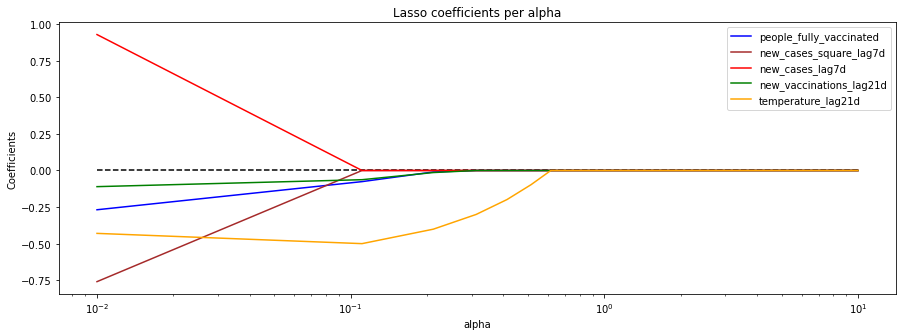

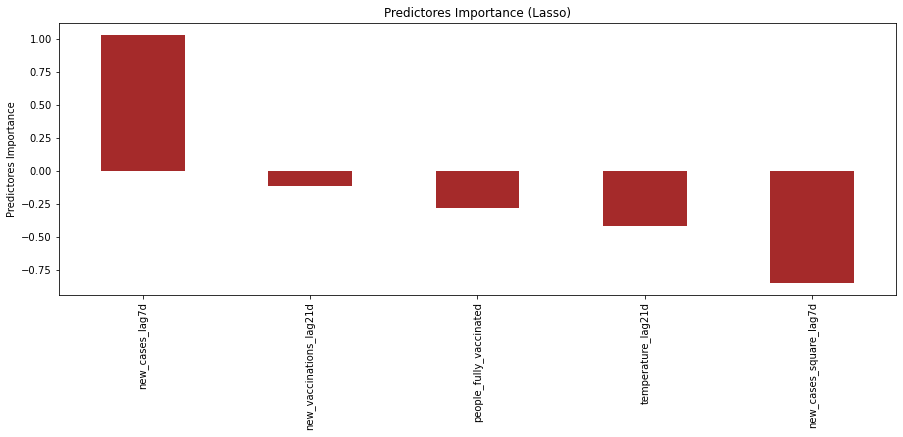

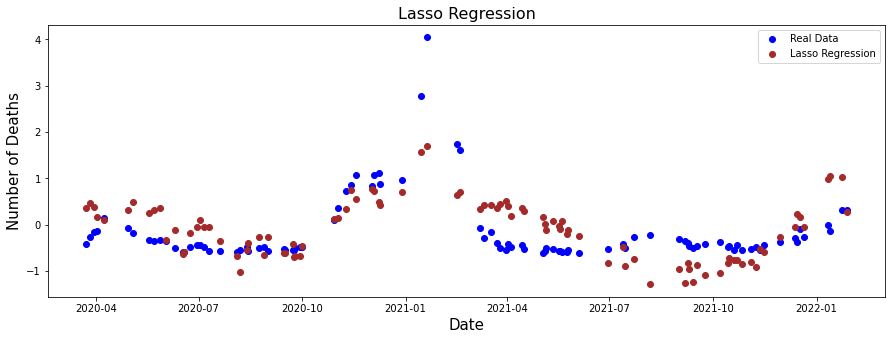

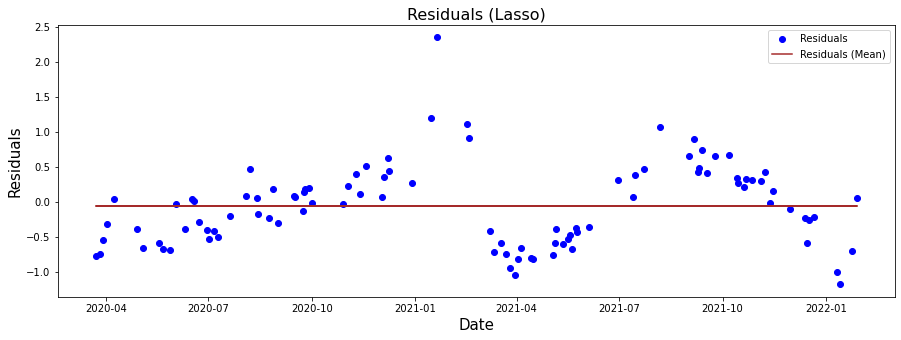

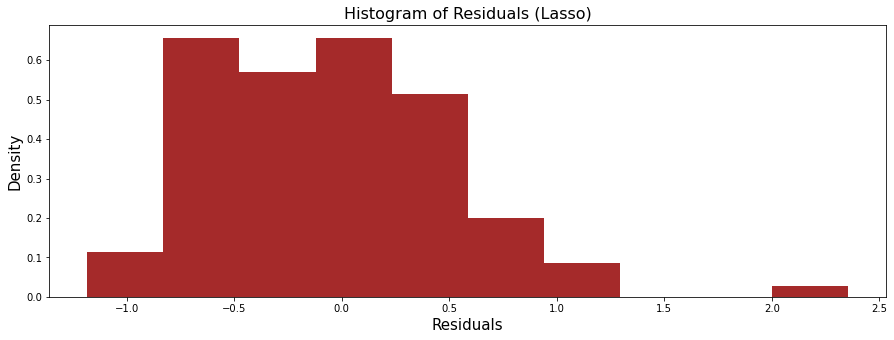

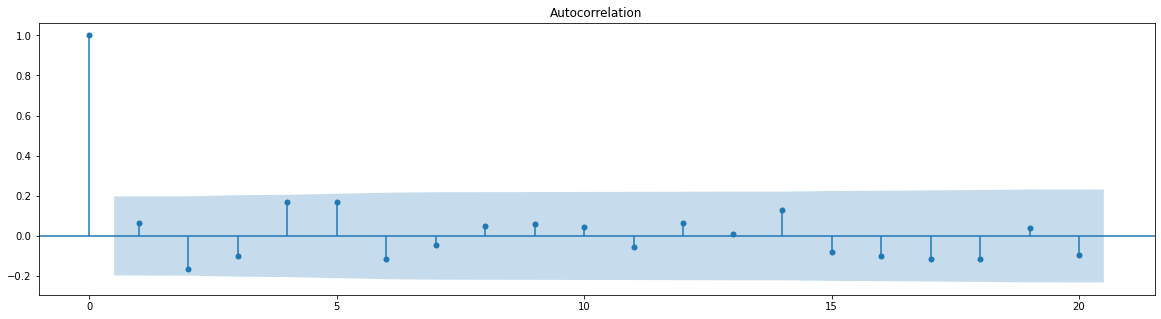

In [135]:
# Lasso Regression

################
### Optimal Alpha
################ 
alphas_Lasso = np.linspace(0.01,10,100)
model_alpha_Lasso = Lasso(max_iter=10000)
coefs_alpha_Lasso = []

for i in alphas_Lasso:
    model_alpha_Lasso.set_params(alpha=i)
    model_alpha_Lasso.fit(X_train, Y_train)
    coefs_alpha_Lasso.append(model_alpha_Lasso.coef_)

# Plot convergency of coefficients with the increase of alpha
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(alphas_Lasso,[item[0] for item in coefs_alpha_Lasso],label='people_fully_vaccinated',color='blue')
ax.plot(alphas_Lasso,[item[1] for item in coefs_alpha_Lasso],label='new_cases_square_lag7d',color='brown')
ax.plot(alphas_Lasso,[item[2] for item in coefs_alpha_Lasso],label='new_cases_lag7d',color='red')
ax.plot(alphas_Lasso,[item[3] for item in coefs_alpha_Lasso],label='new_vaccinations_lag21d',color='green')
ax.plot(alphas_Lasso,[item[4] for item in coefs_alpha_Lasso],label='temperature_lag21d',color='orange')
ax.hlines(y=0, xmin=0.01, xmax=10, linestyle = 'dashed', color='black')
ax.set_xscale('log')
ax.set_title('Lasso coefficients per alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('Coefficients')
ax.legend()

# Find optimal alpha's
model_alpha_Lasso = LassoCV(cv=5, random_state=8, max_iter=10000)
model_alpha_Lasso.fit(X_train, Y_train)
opt_alpha_Lasso = model_alpha_Lasso.alpha_
print("\n\033[1mOptimal Alpha (Lasso):\033[0m", opt_alpha_Lasso)
print("-"*120)
print("-"*120)

################
### Fit Model
################ 
model_Lasso = Lasso(alpha = opt_alpha_Lasso)
model_Lasso_fit = model_Lasso.fit(X_train,Y_train)
coefs_Lasso = []
coefs_Lasso.append(model_Lasso.coef_)
coefs_Lasso_df = pd.DataFrame(coefs_Lasso)
coefs_Lasso_df.rename(columns = {0:'people_fully_vaccinated',1:'new_cases_square_lag7d',2:'new_cases_lag7d',3:'new_vaccinations_lag21d',4:'temperature_lag21d'}, inplace = True)
coefs_Lasso_df['Coefficients'] = 'Coefficients'
coefs_Lasso_df.set_index('Coefficients', inplace = True)
coefs_Lasso_df = coefs_Lasso_df.style.set_properties(**{'text-align': 'center'})
print(" "* 5,"\n\033[1mLasso Model\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_Lasso_df)
    print("-"*120)

################
### Prediction
################ 
Y_test_pred_Lasso = model_Lasso.predict(X_test)
Y_test_pred_Lasso = pd.DataFrame(Y_test_pred_Lasso)
Y_test_pred_Lasso.rename(columns = {0: 'Lasso Regression'}, inplace = True)
Y_test = Y_test.reset_index()
Y_test_pred_Lasso['Date'] = Y_test['Date']
Y_test_pred_Lasso.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
predictors_Lasso=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance_Lasso= pd.Series(model_Lasso.coef_, predictors_Lasso).sort_values(ascending=False)
pred_importance_Lasso.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Lasso)')

################
### Plot Y predict vs Y real
################ 
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(Y_test_pred_Lasso, 'o', c='brown', label="Lasso Regression")
ax.set_title('Lasso Regression',{'fontsize': 16})
ax.set_xlabel('Date', {'fontsize': 15})
ax.set_ylabel('Number of Deaths', {'fontsize': 15})
ax.legend()

################
### Residuals
################ 

# Residuals
residuals_Lasso_df = pd.DataFrame(Y_test.values - Y_test_pred_Lasso.values,columns=Y_test.columns)
residuals_Lasso_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_Lasso_df.index = Y_test.index
residuals_Lasso_df = residuals_Lasso_df.reset_index()
residuals_Lasso_df['mean'] = residuals_Lasso_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_Lasso_df)

#Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_Lasso_df['Date'],residuals_Lasso_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_Lasso_df['Date'],residuals_Lasso_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Lasso)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_Lasso_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Lasso)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals 
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_Lasso_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - Y_test_pred_Lasso.values))



In [136]:
# Gradient Boosting - Optimize Parameters

################
### Optimizing Parameters
################

optimize = {'learning_rate': uniform(0.001,0.1),'subsample': uniform(0.1,0.9), 'n_estimators' : randint(100, 1000),'max_depth': randint(2, 10),'min_samples_split':randint(2, 10),'min_samples_leaf': randint(5,15),'max_features':randint(2,10)}
optimize_GB = RandomizedSearchCV(estimator =GradientBoostingRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100, random_state = 8)
optimize_GB.fit(X_train,Y_train)
best_params_GB = pd.DataFrame(optimize_GB.best_params_.items())
best_params_GB= best_params_GB.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_GB_list = []
best_score_GB_list.append(optimize_GB.best_score_)
best_score_GB = pd.DataFrame(best_score_GB_list)
best_score_GB= best_score_GB.rename(columns={0: 'Best Score'})
display(best_params_GB.style.hide_index())
display(best_score_GB.style.hide_index())

################
### Parameters to list
################
learning_rate_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'learning_rate', 'Best Values'].item()
max_depth_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'max_depth', 'Best Values'].item()
max_features_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'max_features', 'Best Values'].item()
min_samples_leaf_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'min_samples_leaf', 'Best Values'].item()
min_samples_split_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'min_samples_split', 'Best Values'].item()
n_estimators_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'n_estimators', 'Best Values'].item()
subsample_opt = best_params_GB.loc[best_params_GB['Predictors'] == 'subsample', 'Best Values'].item()
max_depth_opt = int(max_depth_opt)
max_features_opt = int(max_features_opt)
min_samples_leaf_opt = int(min_samples_leaf_opt)
min_samples_split_opt = int(min_samples_split_opt)
n_estimators_opt = int(n_estimators_opt)

print("\n\033[1mBest Estimator:\033[0m\n", optimize_GB.best_estimator_)

Predictors,Best Values
learning_rate,0.076550
max_depth,8.000000
max_features,2.000000
min_samples_leaf,6.000000
min_samples_split,7.000000
n_estimators,772.000000
subsample,0.874072


Best Score
0.956861



Best Estimator:
 GradientBoostingRegressor(learning_rate=0.07654967364458737, max_depth=8,
                          max_features=2, min_samples_leaf=6,
                          min_samples_split=7, n_estimators=772,
                          subsample=0.8740723419892913)


      
Gradient Boosting Model (Optimized)


,Coefficients
Predictors,
temperature_lag21d,0.357158
new_cases_square_lag7d,0.195727
people_fully_vaccinated,0.187416
new_cases_lag7d,0.153401
new_vaccinations_lag21d,0.106298


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2020-09-23,-0.103414,0.022793
1,2021-02-18,0.536290,0.022793
2,2020-08-14,-0.031694,0.022793
3,2021-05-20,-0.069188,0.022793
4,2020-04-02,0.118735,0.022793
...,...,...,...
94,2020-08-07,0.044358,0.022793
95,2020-11-18,-0.196868,0.022793
96,2020-06-02,0.209212,0.022793
97,2020-03-30,-0.098564,0.022793


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.88622973]


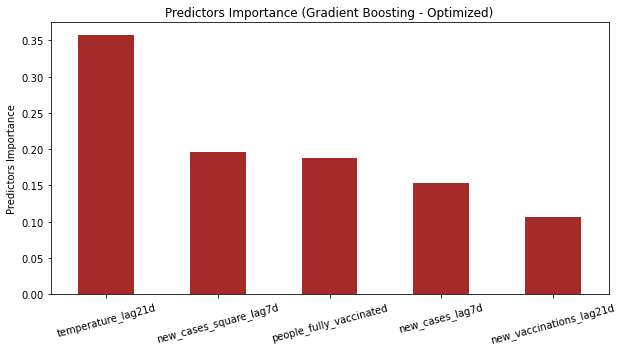

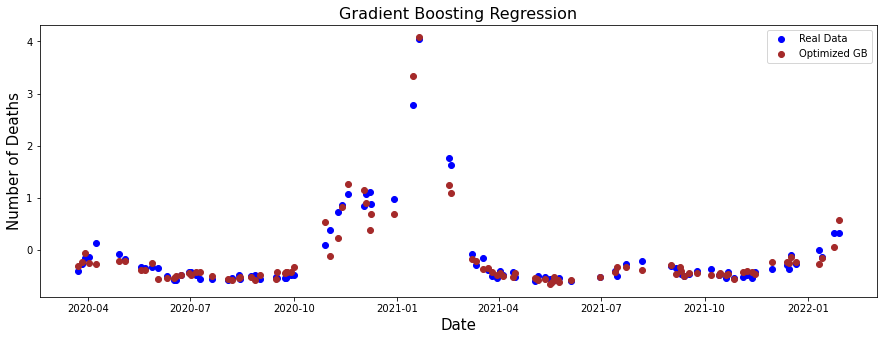

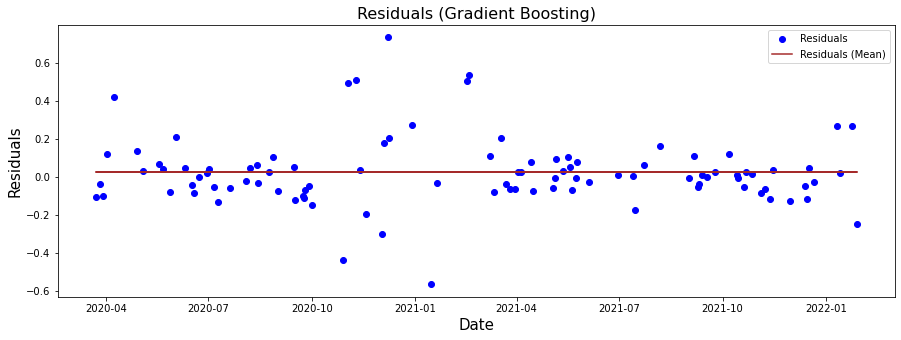

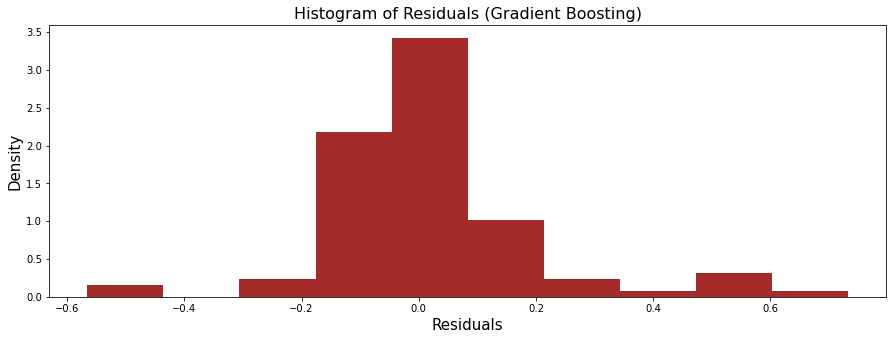

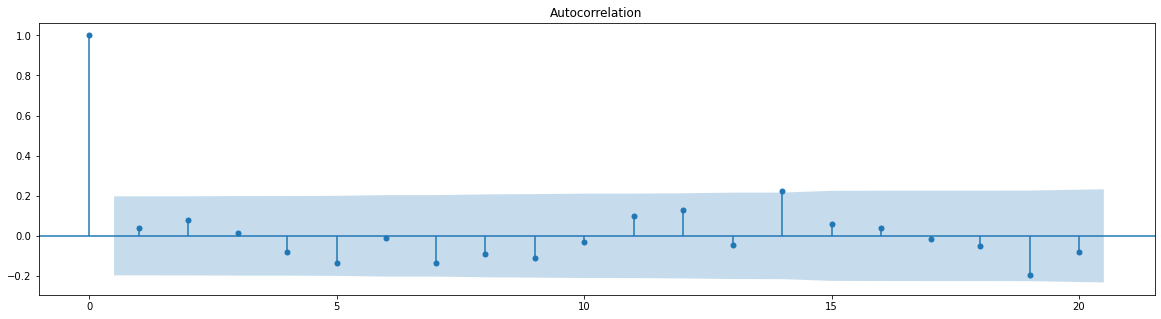

In [137]:
# Gradient Boosting Regression

################
### Fit Model
################
optimize_GB = GradientBoostingRegressor(learning_rate=learning_rate_opt, n_estimators=n_estimators_opt,max_depth=max_depth_opt, min_samples_split=min_samples_split_opt, min_samples_leaf=min_samples_leaf_opt, subsample=subsample_opt,max_features=max_features_opt, random_state = 8)
optimize_GB.fit(X_train,Y_train)

################
### Prediction
################

# Prediction
predictors_GB=list(X_train)
fig, ax = plt.subplots(figsize=(10,5))
pred_importance= pd.Series(optimize_GB.feature_importances_, predictors_GB).sort_values(ascending=False)
pred_importance.plot.bar( color = 'brown')
plt.ylabel('Predictors Importance')
plt.title('Predictors Importance (Gradient Boosting - Optimized)')
ax.tick_params(axis='x', rotation=15)
optimize_GB_pred=optimize_GB.predict(X_test)
optimize_GB_pred = pd.DataFrame(optimize_GB_pred)
coefs_optimize_GB_df = pd.DataFrame(optimize_GB.feature_importances_)
coefs_optimize_GB_df.rename(columns = {0:'Coefficients'}, inplace = True)
coefs_optimize_GB_df['Predictors'] = predictors_GB
coefs_optimize_GB_df.set_index('Predictors', inplace = True)
coefs_optimize_GB_df = coefs_optimize_GB_df.sort_values(by=['Coefficients'], ascending = False)
print(" "* 5,"\n\033[1mGradient Boosting Model (Optimized)\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_optimize_GB_df)
    print("-"*120)

#Plotting
optimize_GB_pred.rename(columns = {0: 'Gradient Boosting Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_GB_pred['Date'] = Y_test['Date']
optimize_GB_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_GB_pred, 'o', c='brown', label="Optimized GB")
ax.set_title('Gradient Boosting Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Number of Deaths',{'fontsize': 15})
ax.legend()

################
### Residuals
################

#Residuals
residuals_optimize_GB_df = pd.DataFrame(Y_test.values - optimize_GB_pred.values,columns=Y_test.columns)
residuals_optimize_GB_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_optimize_GB_df.index = Y_test.index
residuals_optimize_GB_df = residuals_optimize_GB_df.reset_index()
residuals_optimize_GB_df['mean'] = residuals_optimize_GB_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_GB_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_GB_df['Date'],residuals_optimize_GB_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_GB_df['Date'],residuals_optimize_GB_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Gradient Boosting)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_GB_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Gradient Boosting)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_GB_df['Residuals'], ax=plt.gca())

# Durbin Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_GB_pred.values))



In [138]:
# MLP Regressor - Optimize Parameters

################
### Optimize Parameters
################

optimize = {'hidden_layer_sizes': tuple(np.random.randint(1,100,size=3)),'activation': ['relu','tanh','logistic'], 'alpha' : uniform(0.0001,0.1),'solver': ['lbfgs', 'sgd', 'adam']}

optimize_MLP = RandomizedSearchCV(estimator =MLPRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100,random_state = 8)
optimize_MLP.fit(X_train,Y_train)

best_params_MLP = pd.DataFrame(optimize_MLP.best_params_.items())
best_params_MLP= best_params_MLP.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_MLP_list = []
best_score_MLP_list.append(optimize_MLP.best_score_)
best_score_MLP = pd.DataFrame(best_score_MLP_list)
best_score_MLP= best_score_MLP.rename(columns={0: 'Best Score'})

display(best_params_MLP.style.hide_index())
display(best_score_MLP.style.hide_index())

################
### Parameters to list
################
hidden_layer_sizes = best_params_MLP.loc[best_params_MLP['Predictors'] == 'hidden_layer_sizes', 'Best Values'].item()
activation = best_params_MLP.loc[best_params_MLP['Predictors'] == 'activation', 'Best Values'].item()
alpha = best_params_MLP.loc[best_params_MLP['Predictors'] == 'alpha', 'Best Values'].item()
solver = best_params_MLP.loc[best_params_MLP['Predictors'] == 'solver', 'Best Values'].item()


hidden_layer_sizes = int(hidden_layer_sizes)


print("\n\033[1mBest Estimator:\033[0m\n", optimize_MLP.best_estimator_)

C:\Users\Alexandre Arriaga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predictors,Best Values
activation,logistic
alpha,0.069459
hidden_layer_sizes,17
solver,lbfgs


Best Score
0.911709



Best Estimator:
 MLPRegressor(activation='logistic', alpha=0.0694588332662829,
             hidden_layer_sizes=17, solver='lbfgs')


      
Residuals


C:\Users\Alexandre Arriaga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Date,Residuals,mean
0,2020-09-23,-0.055283,0.013657
1,2021-02-18,0.658237,0.013657
2,2020-08-14,-0.028904,0.013657
3,2021-05-20,0.023578,0.013657
4,2020-04-02,0.069444,0.013657
...,...,...,...
94,2020-08-07,-0.013304,0.013657
95,2020-11-18,0.249603,0.013657
96,2020-06-02,0.182357,0.013657
97,2020-03-30,0.025548,0.013657


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.80434223]


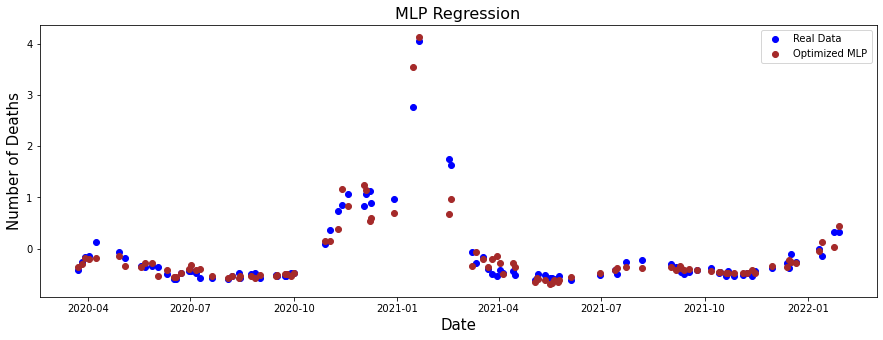

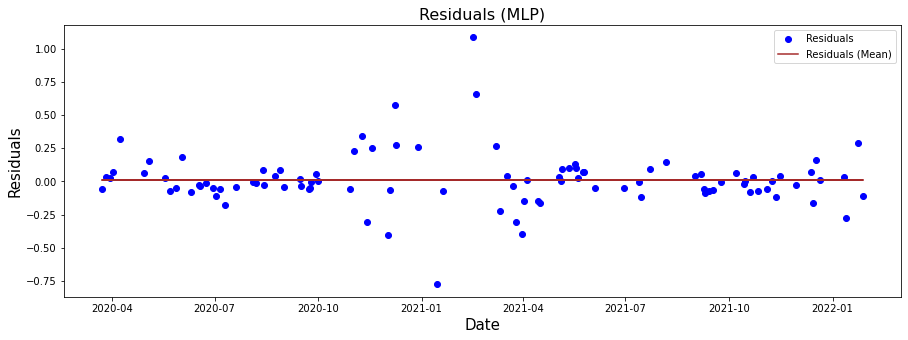

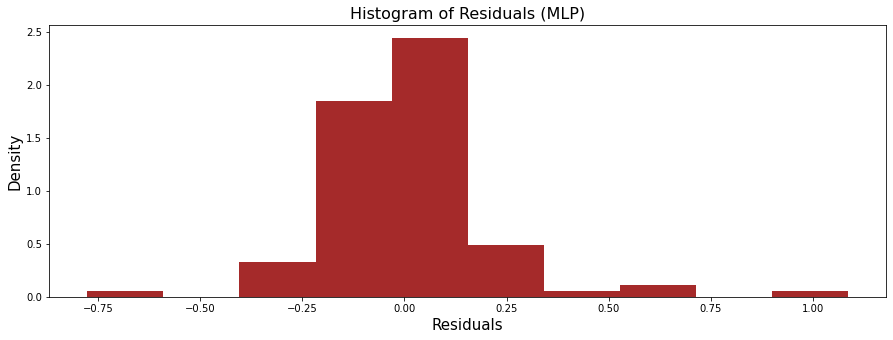

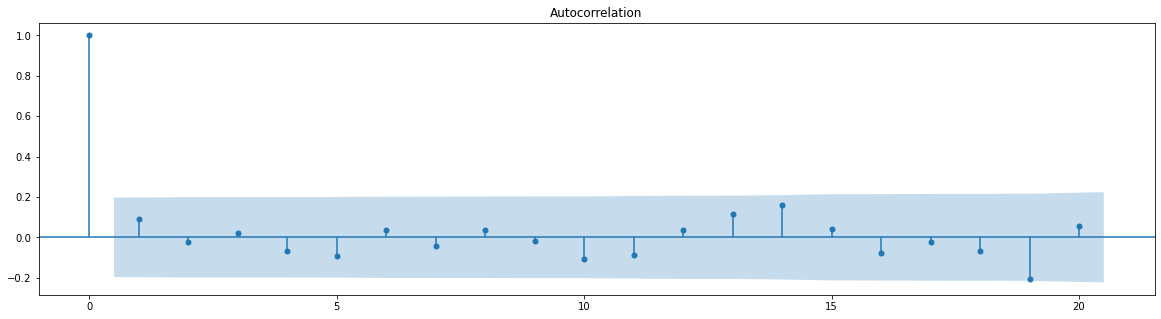

In [139]:
# MLP Regression

################
### Fit Model
################
optimize_MLP = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,activation=activation,alpha=alpha,solver=solver, random_state = 8)
optimize_MLP.fit(X_train,Y_train)

################
### Prediction
################

#Prediction
optimize_MLP_pred=optimize_MLP.predict(X_test)
optimize_MLP_pred = pd.DataFrame(optimize_MLP_pred)

#Plotting
optimize_MLP_pred.rename(columns = {0: 'MLP Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_MLP_pred['Date'] = Y_test['Date']
optimize_MLP_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_MLP_pred, 'o', c='brown', label="Optimized MLP")
ax.set_title('MLP Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Number of Deaths',{'fontsize': 15})
ax.legend()

################
### Residuals
################

# Residuals
residuals_optimize_MLP_df = pd.DataFrame(Y_test.values - optimize_MLP_pred.values,columns=Y_test.columns)
residuals_optimize_MLP_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_optimize_MLP_df.index = Y_test.index
residuals_optimize_MLP_df = residuals_optimize_MLP_df.reset_index()
residuals_optimize_MLP_df['mean'] = residuals_optimize_MLP_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_MLP_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_MLP_df['Date'],residuals_optimize_MLP_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_MLP_df['Date'],residuals_optimize_MLP_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (MLP)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_MLP_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (MLP)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_MLP_df['Residuals'], ax=plt.gca())

# Durbin-Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_MLP_pred.values))


In [140]:
# Random Forest Regressor - Optimize Parameters

################
### Optimize Parameters
################

optimize = {'n_estimators' : randint(100, 1000),'max_depth': randint(2, 10),'min_samples_split':randint(2, 10),'min_samples_leaf': randint(5,15),'max_features':randint(2,10)}

optimize_RF = RandomizedSearchCV(estimator =RandomForestRegressor(), param_distributions = optimize,n_jobs=-1, cv=5, n_iter = 100, random_state = 8)
optimize_RF.fit(X_train,Y_train)


best_params_RF = pd.DataFrame(optimize_RF.best_params_.items())
best_params_RF= best_params_RF.rename(columns={0: 'Predictors',1:'Best Values'}) 
best_score_RF_list = []
best_score_RF_list.append(optimize_RF.best_score_)
best_score_RF = pd.DataFrame(best_score_RF_list)
best_score_RF= best_score_RF.rename(columns={0: 'Best Score'})

display(best_params_RF.style.hide_index())
display(best_score_RF.style.hide_index())

################
### Parameters to List
################
max_depth_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'max_depth', 'Best Values'].item()
max_features_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'max_features', 'Best Values'].item()
min_samples_leaf_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'min_samples_leaf', 'Best Values'].item()
min_samples_split_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'min_samples_split', 'Best Values'].item()
n_estimators_opt = best_params_RF.loc[best_params_RF['Predictors'] == 'n_estimators', 'Best Values'].item()

max_depth_opt = int(max_depth_opt)
max_features_opt = int(max_features_opt)
min_samples_leaf_opt = int(min_samples_leaf_opt)
min_samples_split_opt = int(min_samples_split_opt)
n_estimators_opt = int(n_estimators_opt)

print("\n\033[1mBest Estimator:\033[0m\n", optimize_RF.best_estimator_)

Predictors,Best Values
max_depth,6
max_features,2
min_samples_leaf,5
min_samples_split,7
n_estimators,776


Best Score
0.904317



Best Estimator:
 RandomForestRegressor(max_depth=6, max_features=2, min_samples_leaf=5,
                      min_samples_split=7, n_estimators=776)


      
Random Forest Model (Optimized)


,Coefficients
Predictors,
temperature_lag21d,0.387927
new_cases_lag7d,0.197256
new_cases_square_lag7d,0.186921
people_fully_vaccinated,0.150155
new_vaccinations_lag21d,0.077740


------------------------------------------------------------------------------------------------------------------------
      
Residuals


,Date,Residuals,mean
0,2020-09-23,-0.120837,0.020012
1,2021-02-18,0.570798,0.020012
2,2020-08-14,-0.064656,0.020012
3,2021-05-20,-0.063559,0.020012
4,2020-04-02,0.174519,0.020012
...,...,...,...
94,2020-08-07,-0.039008,0.020012
95,2020-11-18,0.058688,0.020012
96,2020-06-02,0.145398,0.020012
97,2020-03-30,0.077543,0.020012


------------------------------------------------------------------------------------------------------------------------

Durbin-Watson Test for Residuals: [1.93261658]


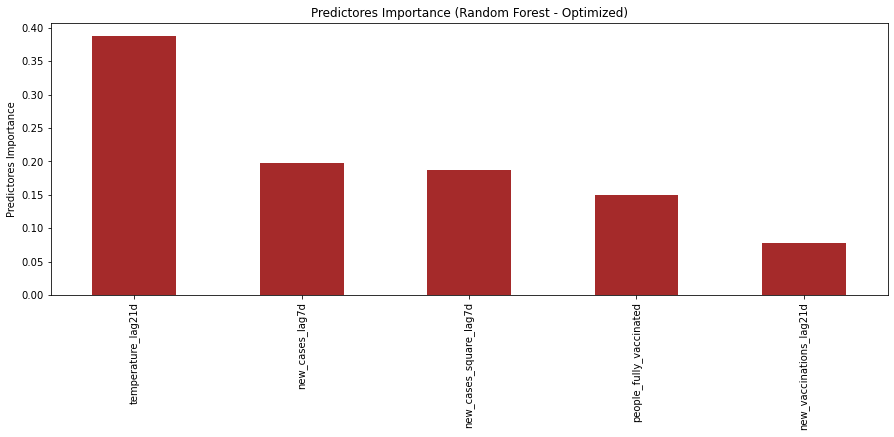

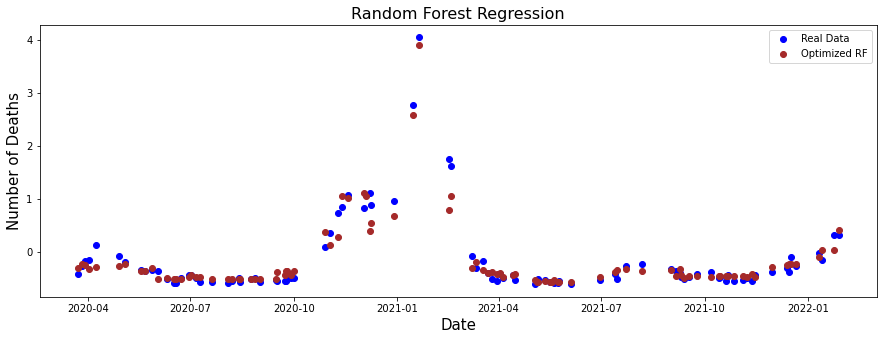

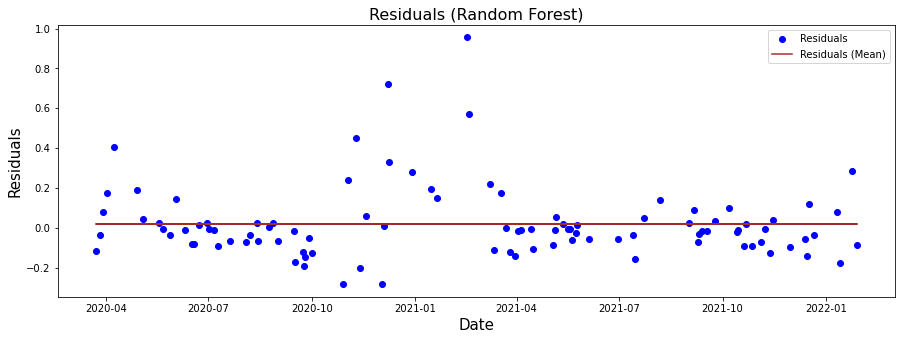

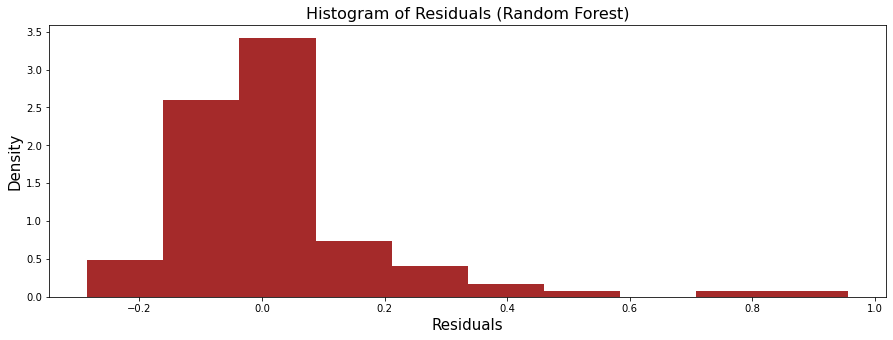

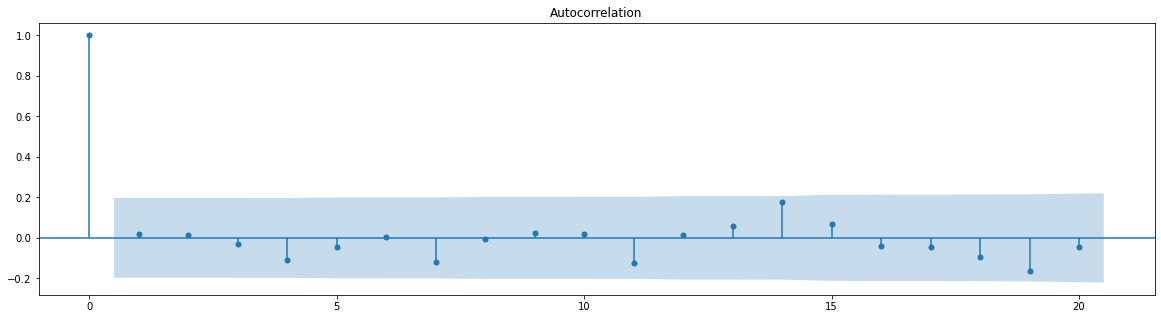

In [141]:
# Random Forest Regression

################
### Fit Model
################
optimize_RF = RandomForestRegressor(n_estimators=n_estimators_opt,max_depth=max_depth_opt, min_samples_split=min_samples_split_opt, min_samples_leaf=min_samples_leaf_opt,max_features=max_features_opt, random_state = 8)
optimize_RF.fit(X_train,Y_train)

################
### Prediction
################

# Prediction
predictors_RF=list(X_train)
fig, ax = plt.subplots(figsize=(15,5))
pred_importance= pd.Series(optimize_RF.feature_importances_, predictors_RF).sort_values(ascending=False)
pred_importance.plot.bar( color = 'brown')
plt.ylabel('Predictores Importance')
plt.title('Predictores Importance (Random Forest - Optimized)')
optimize_RF_pred=optimize_RF.predict(X_test)
optimize_RF_pred = pd.DataFrame(optimize_RF_pred)
coefs_optimize_RF_df = pd.DataFrame(optimize_RF.feature_importances_)
coefs_optimize_RF_df.rename(columns = {0:'Coefficients'}, inplace = True)
coefs_optimize_RF_df['Predictors'] = predictors_RF
coefs_optimize_RF_df.set_index('Predictors', inplace = True)
coefs_optimize_RF_df = coefs_optimize_RF_df.sort_values(by=['Coefficients'], ascending = False)
print(" "* 5,"\n\033[1mRandom Forest Model (Optimized)\033[0m")
with pd.option_context('expand_frame_repr', False):
    display(coefs_optimize_RF_df)
    print("-"*120)

# Plotting
optimize_RF_pred.rename(columns = {0: 'Random Forest Optimized'}, inplace = True)
Y_test = Y_test.reset_index()
optimize_RF_pred['Date'] = Y_test['Date']
optimize_RF_pred.set_index('Date', inplace=True)
Y_test.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o', c='b', label="Real Data")
ax.plot(optimize_RF_pred, 'o', c='brown', label="Optimized RF")
ax.set_title('Random Forest Regression',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Number of Deaths',{'fontsize': 15})
ax.legend()

################
### Residuals
################

# Residuals
residuals_optimize_RF_df = pd.DataFrame(Y_test.values - optimize_RF_pred.values,columns=Y_test.columns)
residuals_optimize_RF_df.rename(columns = {'new_deaths':'Residuals'}, inplace = True)
residuals_optimize_RF_df.index = Y_test.index
residuals_optimize_RF_df = residuals_optimize_RF_df.reset_index()
residuals_optimize_RF_df['mean'] = residuals_optimize_RF_df['Residuals'].mean()
print(" "* 5,"\n\033[1mResiduals\033[0m")
display(residuals_optimize_RF_df)

# Plotting
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(residuals_optimize_RF_df['Date'],residuals_optimize_RF_df['Residuals'], 'o', c='b', label='Residuals')
ax.plot(residuals_optimize_RF_df['Date'],residuals_optimize_RF_df['mean'], c='brown', label='Residuals (Mean)')
ax.set_title('Residuals (Random Forest)',{'fontsize': 16})
ax.set_xlabel('Date',{'fontsize': 15})
ax.set_ylabel('Residuals',{'fontsize': 15})
ax.legend()
fig,ax = plt.subplots(figsize=(15,5))
ax.hist(residuals_optimize_RF_df['Residuals'],color = 'brown',density = True)
ax.set_title('Histogram of Residuals (Random Forest)',{'fontsize': 16})
ax.set_xlabel('Residuals',{'fontsize': 15})
ax.set_ylabel('Density',{'fontsize': 15})

# ACF of Residuals
plt.figure(figsize=(20,5))
acf =plot_acf(residuals_optimize_RF_df['Residuals'], ax=plt.gca())

# Durbin-Watson Test
print("-"*120)
print("\n\033[1mDurbin-Watson Test for Residuals:\033[0m",durbin_watson(Y_test.values - optimize_RF_pred.values))

------------------------------------------------------------------------------------------------------------------------
      
Ridge Regression                                                OLS Regression

------------------------------------------------------------------------------------------------------------------------

MAE                                                             MAE
MAE: 0.4600845549601179                                         MAE: 0.4600583726923081

MSE                                                             MSE
MSE: 0.33348385290193366                                         MSE: 0.3334568879840893

Median Absolute Error                                           Median Absolute Error
Median Absolute Error: 0.39864105819315027                       Median Absolute Error: 0.3985274174554554

Explained Variance Score                                        Explained Variance Score
Explained Variance Score: 0.3659819700458936                   Explained

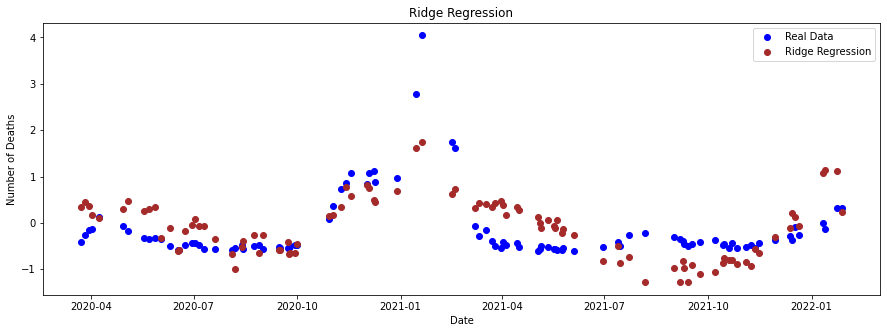

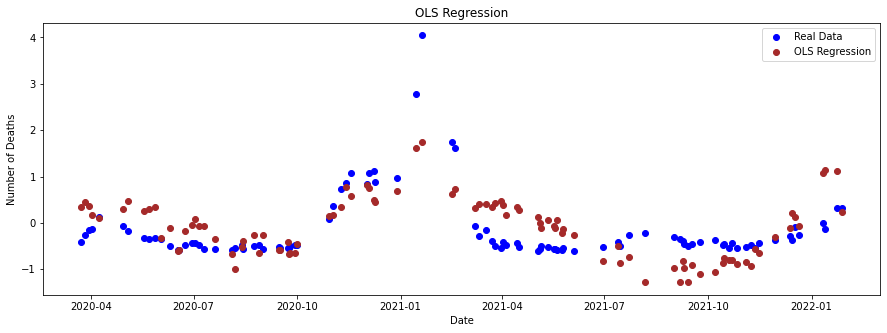

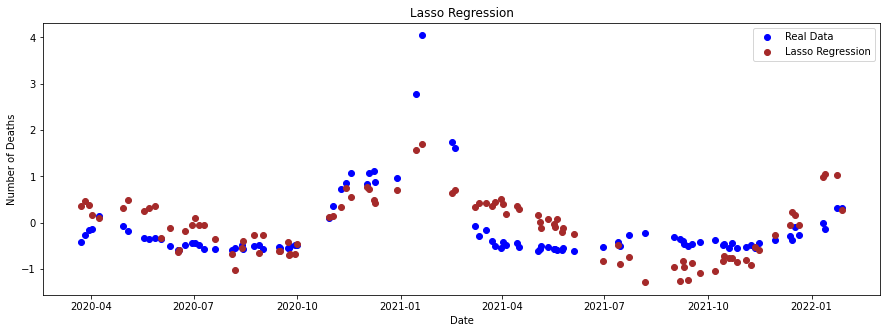

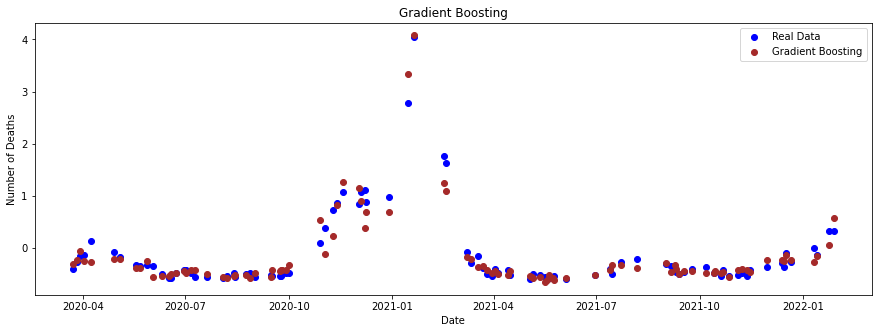

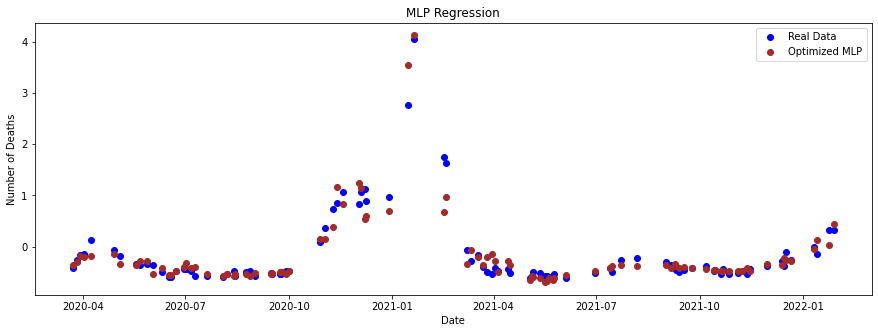

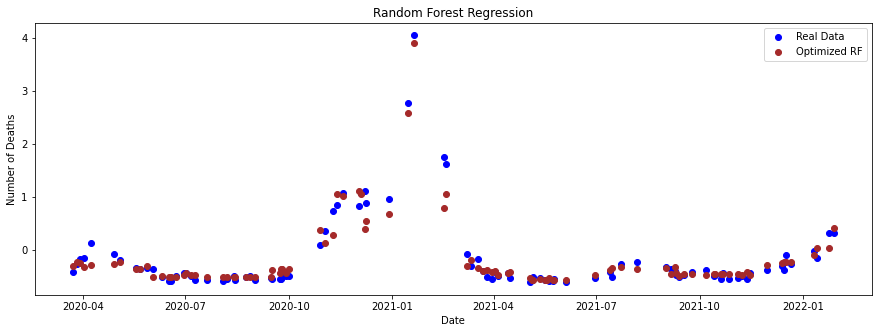

In [142]:
####################### Comparing Models (OLS Regression vs Ridge Regression vs Lasso Regression vs Bayesian Ridge Regression vs Gradient Boosting vs MLP vs Random Forest) #####################
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',  c='b', label="Real Data")
ax.plot(Y_test_pred_Ridge, 'o',c='brown', label="Ridge Regression")
ax.set_title('Ridge Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(Y_test_pred_ols, 'o',c='brown', label="OLS Regression")
ax.set_title('OLS Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(Y_test_pred_Lasso, 'o',c='brown', label="Lasso Regression")
ax.set_title('Lasso Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
ax.legend(loc="best")
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_GB_pred, 'o',c='brown', label="Gradient Boosting")
ax.legend(loc="best")
ax.set_title('Gradient Boosting')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_MLP_pred, 'o',c='brown', label="Optimized MLP")
ax.legend(loc="best")
ax.set_title('MLP Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Y_test, 'o',c='b', label="Real Data")
ax.plot(optimize_RF_pred, 'o',c='brown', label="Optimized RF")
ax.legend(loc="best")
ax.set_title('Random Forest Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Deaths')

print("-"*120)
print(" "* 5,"\n\033[1mRidge Regression\033[0m"," "* 46, "\033[1mOLS Regression\033[0m\n" )
print("-"*120)

#### OLS and Ridge
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_Ridge)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_ols)                                                       )
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_Ridge)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_ols))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_Ridge)," "* 21 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_ols)) 
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m"," "* 38,"\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_Ridge)," "* 17 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_ols) )
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, Y_test_pred_Ridge)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, Y_test_pred_ols))

print("-"*120)
print(" "* 5,"\n\033[1mLasso Regression\033[0m"," "* 45, "\033[1m Gradient Boosting Regression\033[0m\n" )
print("-"*120) 

#### Lasso and Gradient Boosting
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, Y_test_pred_Lasso)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, optimize_GB_pred))                                                       
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test, Y_test_pred_Lasso)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, optimize_GB_pred))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, Y_test_pred_Lasso)," "* 20 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_GB_pred)) 
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m"," "* 38,"\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, Y_test_pred_Lasso)," "* 18 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_GB_pred) )
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, Y_test_pred_Lasso)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, optimize_GB_pred))

print("-"*120)
print(" "* 5,"\n\033[1mMLP Regression\033[0m"," "* 46, "\033[1mRandom Forest Regression\033[0m\n" )
print("-"*120)

### MLP and Random Forest
# Mean absolute error 
print("\n\033[1mMAE\033[0m"," "*59 ,"\033[1mMAE\033[0m")
print("MAE:" , skl.mean_absolute_error(Y_test, optimize_MLP_pred)," "* 39 ,"MAE:" , skl.mean_absolute_error(Y_test, optimize_RF_pred))                                                   
# Mean squared error 
print("\n\033[1mMSE\033[0m"," "* 59,"\033[1mMSE\033[0m")
print("MSE:" , skl.mean_squared_error(Y_test,optimize_MLP_pred)," "* 39 ,"MSE:" , skl.mean_squared_error(Y_test, optimize_RF_pred))
# Median absolute error 
print("\n\033[1mMedian Absolute Error\033[0m"," "* 41,"\033[1mMedian Absolute Error\033[0m")
print("Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_MLP_pred)," "* 20 ,"Median Absolute Error:", skl.median_absolute_error(Y_test, optimize_RF_pred))
# Explain variance score 
print("\n\033[1mExplained Variance Score\033[0m", " " * 38, "\033[1mExplained Variance Score\033[0m")
print("Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_MLP_pred)," "* 18 ,"Explained Variance Score:" , skl.explained_variance_score(Y_test, optimize_RF_pred))
# R2 Score
print("\n\033[1mR2 Score\033[0m"," "* 54,"\033[1mR2 Score\033[0m")
print("R2 Score:" , skl.r2_score(Y_test, optimize_MLP_pred)," "* 34 ,"R2 Score:" , skl.r2_score(Y_test, optimize_RF_pred))

print("-"*120)
print("\n")
print("-"*120) 